### Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%run '/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/Utilities.ipynb'

     |████████████████████████████████| 1.1 MB 12.7 MB/s 


In [4]:
MODELS_FOLDER = "/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch"

In [ ]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/trainingSet.zip" -d "/content/drive/Shareddrives/CIDL Project/data"

replace /content/drive/Shareddrives/CIDL Project/data/trainingSet/MEL/ISIC_0000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/Shareddrives/CIDL Project/data/trainingSet/MEL/ISIC_0000004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/validationSet.zip" -d "/content/drive/Shareddrives/CIDL Project/data"

In [ ]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/testSet.zip" -d "/content/drive/Shareddrives/CIDL Project/data"

In [ ]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/trainingSetNoClahe.zip" -d "/content/drive/Shareddrives/CIDL Project/data"

In [ ]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/validationSetNoClahe.zip" -d "/content/drive/Shareddrives/CIDL Project/data"

In [ ]:
!unzip -q "/content/drive/Shareddrives/CIDL Project/data/testSetNoClahe.zip" -d "/content/drive/Shareddrives/CIDL Project/data"

## Creation training, validation and test sets

In [5]:
#data location path
%cd "/content/drive/Shareddrives/CIDL Project/data"

/content/drive/Shareddrives/CIDL Project/data


In [6]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 196
IMAGE_WIDTH = 196

In [7]:
training_dir = PATH = 'trainingSet'
validation_dir = 'validationSet'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  label_mode="categorical",
  labels="inferred",
  shuffle=True,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  label_mode="categorical",
  labels="inferred",
  shuffle=True,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 13139 files belonging to 8 classes.
Found 2069 files belonging to 8 classes.


In [8]:
test_dir = "testSet"

test_dataset = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  label_mode="categorical",
  labels="inferred",
  shuffle=False,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 1867 files belonging to 8 classes.


## Creation training, validation and test sets NO CLAHE

In [ ]:
training_dir_no_clahe = PATH = 'trainingSetNoClahe'
validation_dir_no_clahe = 'validationSetNoClahe'

training_dataset_no_clahe = tf.keras.utils.image_dataset_from_directory(
  training_dir_no_clahe,
  label_mode="categorical",
  labels="inferred",
  shuffle=True,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset_no_clahe = tf.keras.utils.image_dataset_from_directory(
  validation_dir_no_clahe,
  label_mode="categorical",
  labels="inferred",
  shuffle=True,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 12961 files belonging to 8 classes.
Found 2529 files belonging to 8 classes.


In [ ]:
test_dir_no_clahe = "testSetNoClahe"

test_dataset_no_clahe = tf.keras.utils.image_dataset_from_directory(
  test_dir_no_clahe,
  label_mode="categorical",
  labels="inferred",
  shuffle=False,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 2277 files belonging to 8 classes.


# CNN from Scratch experiments

---



In [9]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("vertical"),
  layers.RandomFlip("horizontal"),
  layers.RandomZoom(0.1, fill_mode="constant", fill_value=0.0),
  layers.RandomRotation(factor=1, fill_mode="constant", fill_value=0.0),
  ]
)

### First Model


Dense layer of 512 neurons without dropout.


In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(196, 196, 3)))
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 4 convolutional layers with zero-padding technique
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((5, 5)))   

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model)
class_weights = compute_class_weights()

In [ ]:
class_weights

{0: 4.719468390804598,
 1: 1.8048076923076923,
 2: 1.3506373355263157,
 3: 1.4134036144578312,
 4: 4.5621527777777775,
 5: 0.8299014653865588,
 6: 0.2851840597325925,
 7: 1.168950177935943}

In [ ]:
history = run_model(model, 'experiment_1', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/411           ETA: ?s - 

Epoch 1/30
411/411 [==============================] - ETA: 0s - loss: 2.8914 - accuracy: 0.2422
Epoch 1: val_loss improved from inf to 1.63179, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
411/411 [==============================] - 3246s 8s/step - loss: 2.8914 - accuracy: 0.2422 - val_loss: 1.6318 - val_accuracy: 0.2765
Epoch 2/30


0/411           ETA: ?s - 

Epoch 2/30
411/411 [==============================] - ETA: 0s - loss: 2.4609 - accuracy: 0.4178
Epoch 2: val_loss improved from 1.63179 to 1.44974, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
411/411 [==============================] - 113s 273ms/step - loss: 2.4609 - accuracy: 0.4178 - val_loss: 1.4497 - val_accuracy: 0.4505
Epoch 3/30


0/411           ETA: ?s - 

Epoch 3/30
411/411 [==============================] - ETA: 0s - loss: 2.3005 - accuracy: 0.4551
Epoch 3: val_loss improved from 1.44974 to 1.40066, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
411/411 [==============================] - 113s 273ms/step - loss: 2.3005 - accuracy: 0.4551 - val_loss: 1.4007 - val_accuracy: 0.4471
Epoch 4/30


0/411           ETA: ?s - 

Epoch 4/30
411/411 [==============================] - ETA: 0s - loss: 2.2137 - accuracy: 0.4734
Epoch 4: val_loss improved from 1.40066 to 1.36050, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
411/411 [==============================] - 113s 273ms/step - loss: 2.2137 - accuracy: 0.4734 - val_loss: 1.3605 - val_accuracy: 0.4809
Epoch 5/30


0/411           ETA: ?s - 

Epoch 5/30
411/411 [==============================] - ETA: 0s - loss: 2.1393 - accuracy: 0.4844
Epoch 5: val_loss did not improve from 1.36050
411/411 [==============================] - 112s 271ms/step - loss: 2.1393 - accuracy: 0.4844 - val_loss: 1.3999 - val_accuracy: 0.4712
Epoch 6/30


0/411           ETA: ?s - 

Epoch 6/30
411/411 [==============================] - ETA: 0s - loss: 2.0940 - accuracy: 0.4949
Epoch 6: val_loss improved from 1.36050 to 1.35229, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
411/411 [==============================] - 114s 275ms/step - loss: 2.0940 - accuracy: 0.4949 - val_loss: 1.3523 - val_accuracy: 0.4925
Epoch 7/30


0/411           ETA: ?s - 

Epoch 7/30
411/411 [==============================] - ETA: 0s - loss: 2.0530 - accuracy: 0.4963
Epoch 7: val_loss improved from 1.35229 to 1.30674, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
411/411 [==============================] - 114s 275ms/step - loss: 2.0530 - accuracy: 0.4963 - val_loss: 1.3067 - val_accuracy: 0.4983
Epoch 8/30


0/411           ETA: ?s - 

Epoch 8/30
411/411 [==============================] - ETA: 0s - loss: 1.9994 - accuracy: 0.5086
Epoch 8: val_loss did not improve from 1.30674
411/411 [==============================] - 113s 273ms/step - loss: 1.9994 - accuracy: 0.5086 - val_loss: 1.3101 - val_accuracy: 0.4896
Epoch 9/30


0/411           ETA: ?s - 

Epoch 9/30
411/411 [==============================] - ETA: 0s - loss: 1.9622 - accuracy: 0.5154
Epoch 9: val_loss improved from 1.30674 to 1.26879, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5
411/411 [==============================] - 114s 274ms/step - loss: 1.9622 - accuracy: 0.5154 - val_loss: 1.2688 - val_accuracy: 0.5273
Epoch 10/30


0/411           ETA: ?s - 

Epoch 10/30
411/411 [==============================] - ETA: 0s - loss: 1.9415 - accuracy: 0.5197
Epoch 10: val_loss did not improve from 1.26879
411/411 [==============================] - 113s 272ms/step - loss: 1.9415 - accuracy: 0.5197 - val_loss: 1.3435 - val_accuracy: 0.4804
Epoch 11/30


0/411           ETA: ?s - 

Epoch 11/30
411/411 [==============================] - ETA: 0s - loss: 1.9042 - accuracy: 0.5218
Epoch 11: val_loss did not improve from 1.26879
411/411 [==============================] - 113s 273ms/step - loss: 1.9042 - accuracy: 0.5218 - val_loss: 1.3205 - val_accuracy: 0.5085
Epoch 12/30


0/411           ETA: ?s - 

Epoch 12/30
411/411 [==============================] - ETA: 0s - loss: 1.8775 - accuracy: 0.5263
Epoch 12: val_loss did not improve from 1.26879
411/411 [==============================] - 113s 272ms/step - loss: 1.8775 - accuracy: 0.5263 - val_loss: 1.2721 - val_accuracy: 0.4959
Epoch 13/30


0/411           ETA: ?s - 

Epoch 13/30
411/411 [==============================] - ETA: 0s - loss: 1.8688 - accuracy: 0.5260
Epoch 13: val_loss did not improve from 1.26879
411/411 [==============================] - 112s 271ms/step - loss: 1.8688 - accuracy: 0.5260 - val_loss: 1.2794 - val_accuracy: 0.5017
Epoch 14/30


0/411           ETA: ?s - 

Epoch 14/30
411/411 [==============================] - ETA: 0s - loss: 1.8513 - accuracy: 0.5278
Epoch 14: val_loss did not improve from 1.26879
411/411 [==============================] - 112s 270ms/step - loss: 1.8513 - accuracy: 0.5278 - val_loss: 1.2944 - val_accuracy: 0.4891
Epoch 14: early stopping


In [ ]:
print(len(os.listdir('trainingSet/AK')))
print(len(os.listdir('trainingSet/BCC')))
print(len(os.listdir('trainingSet/BKL')))
print(len(os.listdir('trainingSet/DF')))
print(len(os.listdir('trainingSet/MEL')))
print(len(os.listdir('trainingSet/NV')))
print(len(os.listdir('trainingSet/SCC')))
print(len(os.listdir('trainingSet/VASC')))


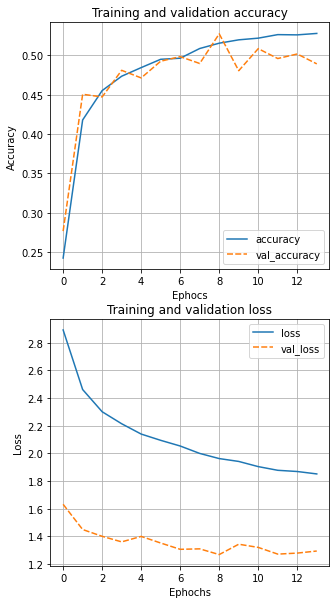

In [ ]:
plot_model_performance(history)

In [ ]:
'''
def undersampling(pathFolder, desiredSamples):
    listFiles = os.listdir(pathFolder)
    print("num samples in: " + pathFolder + "\t " + str(len(os.listdir(pathFolder))) + " : " + str(desiredSamples))
    filesToDelete = listFiles[desiredSamples:]
    for file in filesToDelete:
        os.remove(pathFolder + file)
'''

In [ ]:
'''
undersampling('trainingSetNoClahe/BCC/', round(len(os.listdir('trainingSetNoClahe/BCC'))*0.6))
undersampling('trainingSetNoClahe/BKL/', round(len(os.listdir('trainingSetNoClahe/BKL'))*0.6))
undersampling('trainingSetNoClahe/MEL/', round(len(os.listdir('trainingSetNoClahe/MEL'))*0.6))
undersampling('trainingSetNoClahe/NV/', round(len(os.listdir('trainingSetNoClahe/NV'))*0.6))
'''

num samples in: trainingSetNoClahe/BCC/	 2692 : 1615
num samples in: trainingSetNoClahe/BKL/	 2126 : 1276
num samples in: trainingSetNoClahe/MEL/	 3663 : 2198
num samples in: trainingSetNoClahe/NV/	 10430 : 6258


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

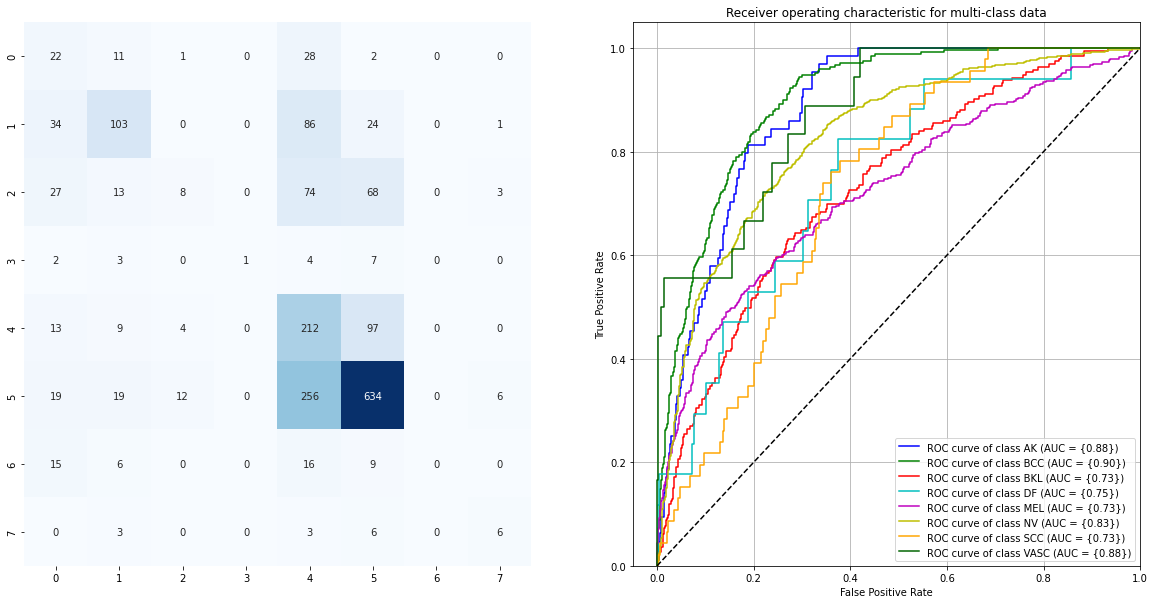

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_1.h5')
#model.summary()
evaluate_model(model)

In [ ]:
model.evaluate(test_dataset)

59/59 [==============================] - 6s 106ms/step - loss: 1.3007 - accuracy: 0.5281


[1.300705909729004, 0.5281199812889099]

### First Model variation (3 conv layers)

Dense layer of 512 neurons without dropout.

*   3 convolutional layers with same size of max-pooling (3x3)




In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 196
IMAGE_WIDTH = 196

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(196, 196, 3)))
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 3 convolutional layers with zero-padding technique
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 196, 196, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                 

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=5)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [ ]:
history = model.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=30)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/581           ETA: ?s - 

Epoch 1/30
581/581 [==============================] - ETA: 0s - loss: 1.2386 - accuracy: 0.5738
Epoch 1: val_loss improved from inf to 1.18080, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 148s 252ms/step - loss: 1.2386 - accuracy: 0.5738 - val_loss: 1.1808 - val_accuracy: 0.5698
Epoch 2/30


0/581           ETA: ?s - 

Epoch 2/30
581/581 [==============================] - ETA: 0s - loss: 1.1225 - accuracy: 0.6077
Epoch 2: val_loss improved from 1.18080 to 1.14656, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 139s 238ms/step - loss: 1.1225 - accuracy: 0.6077 - val_loss: 1.1466 - val_accuracy: 0.5800
Epoch 3/30


0/581           ETA: ?s - 

Epoch 3/30
581/581 [==============================] - ETA: 0s - loss: 1.0670 - accuracy: 0.6202
Epoch 3: val_loss improved from 1.14656 to 1.08337, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 143s 245ms/step - loss: 1.0670 - accuracy: 0.6202 - val_loss: 1.0834 - val_accuracy: 0.5969
Epoch 4/30


0/581           ETA: ?s - 

Epoch 4/30
581/581 [==============================] - ETA: 0s - loss: 1.0350 - accuracy: 0.6291
Epoch 4: val_loss improved from 1.08337 to 1.03006, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 153s 262ms/step - loss: 1.0350 - accuracy: 0.6291 - val_loss: 1.0301 - val_accuracy: 0.6196
Epoch 5/30


0/581           ETA: ?s - 

Epoch 5/30
581/581 [==============================] - ETA: 0s - loss: 1.0101 - accuracy: 0.6386
Epoch 5: val_loss improved from 1.03006 to 0.98891, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 143s 245ms/step - loss: 1.0101 - accuracy: 0.6386 - val_loss: 0.9889 - val_accuracy: 0.6390
Epoch 6/30


0/581           ETA: ?s - 

Epoch 6/30
581/581 [==============================] - ETA: 0s - loss: 1.0048 - accuracy: 0.6393
Epoch 6: val_loss did not improve from 0.98891
581/581 [==============================] - 138s 237ms/step - loss: 1.0048 - accuracy: 0.6393 - val_loss: 1.0152 - val_accuracy: 0.6259
Epoch 7/30


0/581           ETA: ?s - 

Epoch 7/30
581/581 [==============================] - ETA: 0s - loss: 0.9893 - accuracy: 0.6436
Epoch 7: val_loss did not improve from 0.98891
581/581 [==============================] - 138s 237ms/step - loss: 0.9893 - accuracy: 0.6436 - val_loss: 1.0007 - val_accuracy: 0.6274
Epoch 8/30


0/581           ETA: ?s - 

Epoch 8/30
581/581 [==============================] - ETA: 0s - loss: 0.9739 - accuracy: 0.6511
Epoch 8: val_loss did not improve from 0.98891
581/581 [==============================] - 136s 232ms/step - loss: 0.9739 - accuracy: 0.6511 - val_loss: 0.9916 - val_accuracy: 0.6394
Epoch 9/30


0/581           ETA: ?s - 

Epoch 9/30
581/581 [==============================] - ETA: 0s - loss: 0.9640 - accuracy: 0.6524
Epoch 9: val_loss improved from 0.98891 to 0.97379, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 142s 244ms/step - loss: 0.9640 - accuracy: 0.6524 - val_loss: 0.9738 - val_accuracy: 0.6423
Epoch 10/30


0/581           ETA: ?s - 

Epoch 10/30
581/581 [==============================] - ETA: 0s - loss: 0.9535 - accuracy: 0.6582
Epoch 10: val_loss improved from 0.97379 to 0.96483, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 144s 246ms/step - loss: 0.9535 - accuracy: 0.6582 - val_loss: 0.9648 - val_accuracy: 0.6462
Epoch 11/30


0/581           ETA: ?s - 

Epoch 11/30
581/581 [==============================] - ETA: 0s - loss: 0.9449 - accuracy: 0.6577
Epoch 11: val_loss did not improve from 0.96483
581/581 [==============================] - 142s 243ms/step - loss: 0.9449 - accuracy: 0.6577 - val_loss: 1.0389 - val_accuracy: 0.6211
Epoch 12/30


0/581           ETA: ?s - 

Epoch 12/30
581/581 [==============================] - ETA: 0s - loss: 0.9366 - accuracy: 0.6623
Epoch 12: val_loss improved from 0.96483 to 0.94271, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 138s 235ms/step - loss: 0.9366 - accuracy: 0.6623 - val_loss: 0.9427 - val_accuracy: 0.6549
Epoch 13/30


0/581           ETA: ?s - 

Epoch 13/30
581/581 [==============================] - ETA: 0s - loss: 0.9251 - accuracy: 0.6678
Epoch 13: val_loss improved from 0.94271 to 0.90798, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5
581/581 [==============================] - 145s 249ms/step - loss: 0.9251 - accuracy: 0.6678 - val_loss: 0.9080 - val_accuracy: 0.6684
Epoch 14/30


0/581           ETA: ?s - 

Epoch 14/30
581/581 [==============================] - ETA: 0s - loss: 0.9199 - accuracy: 0.6674
Epoch 14: val_loss did not improve from 0.90798
581/581 [==============================] - 144s 246ms/step - loss: 0.9199 - accuracy: 0.6674 - val_loss: 0.9450 - val_accuracy: 0.6573
Epoch 15/30


0/581           ETA: ?s - 

Epoch 15/30
581/581 [==============================] - ETA: 0s - loss: 0.9138 - accuracy: 0.6675
Epoch 15: val_loss did not improve from 0.90798
581/581 [==============================] - 144s 247ms/step - loss: 0.9138 - accuracy: 0.6675 - val_loss: 0.9506 - val_accuracy: 0.6525
Epoch 16/30


0/581           ETA: ?s - 

Epoch 16/30
581/581 [==============================] - ETA: 0s - loss: 0.9032 - accuracy: 0.6737
Epoch 16: val_loss did not improve from 0.90798
581/581 [==============================] - 143s 245ms/step - loss: 0.9032 - accuracy: 0.6737 - val_loss: 0.9146 - val_accuracy: 0.6612
Epoch 17/30


0/581           ETA: ?s - 

Epoch 17/30
581/581 [==============================] - ETA: 0s - loss: 0.8982 - accuracy: 0.6749
Epoch 17: val_loss did not improve from 0.90798
581/581 [==============================] - 145s 248ms/step - loss: 0.8982 - accuracy: 0.6749 - val_loss: 0.9628 - val_accuracy: 0.6346
Epoch 18/30


0/581           ETA: ?s - 

Epoch 18/30
581/581 [==============================] - ETA: 0s - loss: 0.8943 - accuracy: 0.6745
Epoch 18: val_loss did not improve from 0.90798
581/581 [==============================] - 143s 245ms/step - loss: 0.8943 - accuracy: 0.6745 - val_loss: 0.9251 - val_accuracy: 0.6491
Epoch 18: early stopping


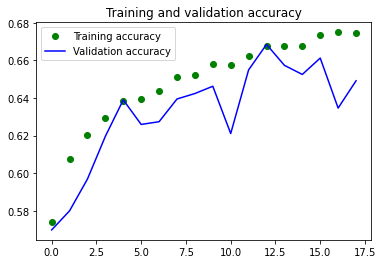

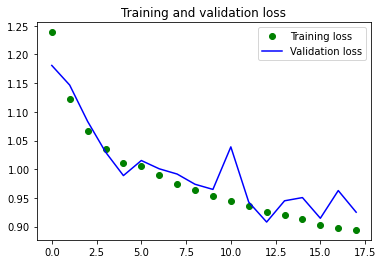

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt   

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy', color='green')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss', color='green')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_true = tf.concat([labels_batch for data_batch, labels_batch in test_dataset], axis = 0)
y_true_cat = np.argmax(y_true, -1)

In [ ]:
def test_model(model):
  pred_Y = model.predict(test_dataset, verbose = True)
  pred_Y_cat = np.argmax(pred_Y, -1)
  print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(y_true_cat, pred_Y_cat)))
  print()
  print(classification_report(y_true_cat, pred_Y_cat))

  sns.heatmap(confusion_matrix(y_true_cat, pred_Y_cat), 
              annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_8 (Rescaling)     (None, 196, 196, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


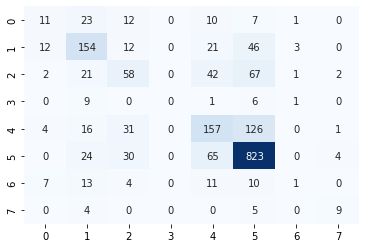

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1var.hdf5')
model.summary()
test_model(model)

In [ ]:
model.evaluate(test_dataset)

59/59 [==============================] - 7s 116ms/step - loss: 0.9496 - accuracy: 0.6497


[0.9496443867683411, 0.6497054100036621]

### First Model Without Clahe


Dense layer of 512 neurons without dropout.

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(196, 196, 3)))
model.add(data_augmentation)
model.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 4 convolutional layers with zero-padding technique
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((5, 5)))   

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=5)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [ ]:
history = model.fit(training_dataset_no_clahe,
          validation_data=validation_dataset_no_clahe,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=30)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/642           ETA: ?s - 

Epoch 1/30
642/642 [==============================] - ETA: 0s - loss: 1.2903 - accuracy: 0.5478
Epoch 1: val_loss improved from inf to 1.18071, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 192s 282ms/step - loss: 1.2903 - accuracy: 0.5478 - val_loss: 1.1807 - val_accuracy: 0.5805
Epoch 2/30


0/642           ETA: ?s - 

Epoch 2/30
642/642 [==============================] - ETA: 0s - loss: 1.1649 - accuracy: 0.5938
Epoch 2: val_loss improved from 1.18071 to 1.13531, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 177s 274ms/step - loss: 1.1649 - accuracy: 0.5938 - val_loss: 1.1353 - val_accuracy: 0.6042
Epoch 3/30


0/642           ETA: ?s - 

Epoch 3/30
642/642 [==============================] - ETA: 0s - loss: 1.1239 - accuracy: 0.6046
Epoch 3: val_loss improved from 1.13531 to 1.09971, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 177s 275ms/step - loss: 1.1239 - accuracy: 0.6046 - val_loss: 1.0997 - val_accuracy: 0.6050
Epoch 4/30


0/642           ETA: ?s - 

Epoch 4/30
642/642 [==============================] - ETA: 0s - loss: 1.0833 - accuracy: 0.6191
Epoch 4: val_loss improved from 1.09971 to 1.08876, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 175s 272ms/step - loss: 1.0833 - accuracy: 0.6191 - val_loss: 1.0888 - val_accuracy: 0.6085
Epoch 5/30


0/642           ETA: ?s - 

Epoch 5/30
642/642 [==============================] - ETA: 0s - loss: 1.0442 - accuracy: 0.6270
Epoch 5: val_loss improved from 1.08876 to 1.02224, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 172s 267ms/step - loss: 1.0442 - accuracy: 0.6270 - val_loss: 1.0222 - val_accuracy: 0.6382
Epoch 6/30


0/642           ETA: ?s - 

Epoch 6/30
642/642 [==============================] - ETA: 0s - loss: 1.0168 - accuracy: 0.6359
Epoch 6: val_loss improved from 1.02224 to 1.01386, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 172s 267ms/step - loss: 1.0168 - accuracy: 0.6359 - val_loss: 1.0139 - val_accuracy: 0.6331
Epoch 7/30


0/642           ETA: ?s - 

Epoch 7/30
642/642 [==============================] - ETA: 0s - loss: 0.9955 - accuracy: 0.6448
Epoch 7: val_loss did not improve from 1.01386
642/642 [==============================] - 174s 269ms/step - loss: 0.9955 - accuracy: 0.6448 - val_loss: 1.0797 - val_accuracy: 0.6010
Epoch 8/30


0/642           ETA: ?s - 

Epoch 8/30
642/642 [==============================] - ETA: 0s - loss: 0.9866 - accuracy: 0.6455
Epoch 8: val_loss improved from 1.01386 to 0.98687, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 174s 270ms/step - loss: 0.9866 - accuracy: 0.6455 - val_loss: 0.9869 - val_accuracy: 0.6528
Epoch 9/30


0/642           ETA: ?s - 

Epoch 9/30
642/642 [==============================] - ETA: 0s - loss: 0.9687 - accuracy: 0.6458
Epoch 9: val_loss did not improve from 0.98687
642/642 [==============================] - 174s 270ms/step - loss: 0.9687 - accuracy: 0.6458 - val_loss: 0.9904 - val_accuracy: 0.6429
Epoch 10/30


0/642           ETA: ?s - 

Epoch 10/30
642/642 [==============================] - ETA: 0s - loss: 0.9609 - accuracy: 0.6542
Epoch 10: val_loss did not improve from 0.98687
642/642 [==============================] - 173s 268ms/step - loss: 0.9609 - accuracy: 0.6542 - val_loss: 1.0107 - val_accuracy: 0.6327
Epoch 11/30


0/642           ETA: ?s - 

Epoch 11/30
642/642 [==============================] - ETA: 0s - loss: 0.9491 - accuracy: 0.6557
Epoch 11: val_loss improved from 0.98687 to 0.95760, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 176s 273ms/step - loss: 0.9491 - accuracy: 0.6557 - val_loss: 0.9576 - val_accuracy: 0.6560
Epoch 12/30


0/642           ETA: ?s - 

Epoch 12/30
642/642 [==============================] - ETA: 0s - loss: 0.9410 - accuracy: 0.6582
Epoch 12: val_loss improved from 0.95760 to 0.94851, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 173s 268ms/step - loss: 0.9410 - accuracy: 0.6582 - val_loss: 0.9485 - val_accuracy: 0.6584
Epoch 13/30


0/642           ETA: ?s - 

Epoch 13/30
642/642 [==============================] - ETA: 0s - loss: 0.9254 - accuracy: 0.6631
Epoch 13: val_loss improved from 0.94851 to 0.94095, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 172s 267ms/step - loss: 0.9254 - accuracy: 0.6631 - val_loss: 0.9410 - val_accuracy: 0.6611
Epoch 14/30


0/642           ETA: ?s - 

Epoch 14/30
642/642 [==============================] - ETA: 0s - loss: 0.9187 - accuracy: 0.6634
Epoch 14: val_loss improved from 0.94095 to 0.93903, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 172s 266ms/step - loss: 0.9187 - accuracy: 0.6634 - val_loss: 0.9390 - val_accuracy: 0.6536
Epoch 15/30


0/642           ETA: ?s - 

Epoch 15/30
642/642 [==============================] - ETA: 0s - loss: 0.9127 - accuracy: 0.6662
Epoch 15: val_loss improved from 0.93903 to 0.93473, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 172s 266ms/step - loss: 0.9127 - accuracy: 0.6662 - val_loss: 0.9347 - val_accuracy: 0.6560
Epoch 16/30


0/642           ETA: ?s - 

Epoch 16/30
642/642 [==============================] - ETA: 0s - loss: 0.9040 - accuracy: 0.6672
Epoch 16: val_loss improved from 0.93473 to 0.92413, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 174s 270ms/step - loss: 0.9040 - accuracy: 0.6672 - val_loss: 0.9241 - val_accuracy: 0.6603
Epoch 17/30


0/642           ETA: ?s - 

Epoch 17/30
642/642 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.6718
Epoch 17: val_loss did not improve from 0.92413
642/642 [==============================] - 176s 274ms/step - loss: 0.8954 - accuracy: 0.6718 - val_loss: 0.9337 - val_accuracy: 0.6481
Epoch 18/30


0/642           ETA: ?s - 

Epoch 18/30
642/642 [==============================] - ETA: 0s - loss: 0.8920 - accuracy: 0.6736
Epoch 18: val_loss did not improve from 0.92413
642/642 [==============================] - 171s 265ms/step - loss: 0.8920 - accuracy: 0.6736 - val_loss: 0.9483 - val_accuracy: 0.6449
Epoch 19/30


0/642           ETA: ?s - 

Epoch 19/30
642/642 [==============================] - ETA: 0s - loss: 0.8841 - accuracy: 0.6733
Epoch 19: val_loss improved from 0.92413 to 0.89331, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 172s 266ms/step - loss: 0.8841 - accuracy: 0.6733 - val_loss: 0.8933 - val_accuracy: 0.6742
Epoch 20/30


0/642           ETA: ?s - 

Epoch 20/30
642/642 [==============================] - ETA: 0s - loss: 0.8801 - accuracy: 0.6772
Epoch 20: val_loss did not improve from 0.89331
642/642 [==============================] - 172s 266ms/step - loss: 0.8801 - accuracy: 0.6772 - val_loss: 0.9348 - val_accuracy: 0.6524
Epoch 21/30


0/642           ETA: ?s - 

Epoch 21/30
642/642 [==============================] - ETA: 0s - loss: 0.8728 - accuracy: 0.6781
Epoch 21: val_loss did not improve from 0.89331
642/642 [==============================] - 170s 264ms/step - loss: 0.8728 - accuracy: 0.6781 - val_loss: 0.9043 - val_accuracy: 0.6702
Epoch 22/30


0/642           ETA: ?s - 

Epoch 22/30
642/642 [==============================] - ETA: 0s - loss: 0.8671 - accuracy: 0.6826
Epoch 22: val_loss did not improve from 0.89331
642/642 [==============================] - 170s 263ms/step - loss: 0.8671 - accuracy: 0.6826 - val_loss: 0.9364 - val_accuracy: 0.6465
Epoch 23/30


0/642           ETA: ?s - 

Epoch 23/30
642/642 [==============================] - ETA: 0s - loss: 0.8591 - accuracy: 0.6853
Epoch 23: val_loss did not improve from 0.89331
642/642 [==============================] - 171s 266ms/step - loss: 0.8591 - accuracy: 0.6853 - val_loss: 0.9164 - val_accuracy: 0.6576
Epoch 24/30


0/642           ETA: ?s - 

Epoch 24/30
642/642 [==============================] - ETA: 0s - loss: 0.8561 - accuracy: 0.6845
Epoch 24: val_loss improved from 0.89331 to 0.88084, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 170s 264ms/step - loss: 0.8561 - accuracy: 0.6845 - val_loss: 0.8808 - val_accuracy: 0.6710
Epoch 25/30


0/642           ETA: ?s - 

Epoch 25/30
642/642 [==============================] - ETA: 0s - loss: 0.8477 - accuracy: 0.6876
Epoch 25: val_loss did not improve from 0.88084
642/642 [==============================] - 170s 264ms/step - loss: 0.8477 - accuracy: 0.6876 - val_loss: 0.9141 - val_accuracy: 0.6603
Epoch 26/30


0/642           ETA: ?s - 

Epoch 26/30
642/642 [==============================] - ETA: 0s - loss: 0.8436 - accuracy: 0.6880
Epoch 26: val_loss improved from 0.88084 to 0.87393, saving model to /content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5
642/642 [==============================] - 171s 265ms/step - loss: 0.8436 - accuracy: 0.6880 - val_loss: 0.8739 - val_accuracy: 0.6766
Epoch 27/30


0/642           ETA: ?s - 

Epoch 27/30
642/642 [==============================] - ETA: 0s - loss: 0.8372 - accuracy: 0.6931
Epoch 27: val_loss did not improve from 0.87393
642/642 [==============================] - 170s 263ms/step - loss: 0.8372 - accuracy: 0.6931 - val_loss: 0.8991 - val_accuracy: 0.6690
Epoch 28/30


0/642           ETA: ?s - 

Epoch 28/30
642/642 [==============================] - ETA: 0s - loss: 0.8344 - accuracy: 0.6927
Epoch 28: val_loss did not improve from 0.87393
642/642 [==============================] - 170s 264ms/step - loss: 0.8344 - accuracy: 0.6927 - val_loss: 0.8900 - val_accuracy: 0.6722
Epoch 29/30


0/642           ETA: ?s - 

Epoch 29/30
642/642 [==============================] - ETA: 0s - loss: 0.8267 - accuracy: 0.6938
Epoch 29: val_loss did not improve from 0.87393
642/642 [==============================] - 169s 262ms/step - loss: 0.8267 - accuracy: 0.6938 - val_loss: 0.9565 - val_accuracy: 0.6425
Epoch 30/30


0/642           ETA: ?s - 

Epoch 30/30
642/642 [==============================] - ETA: 0s - loss: 0.8226 - accuracy: 0.6963
Epoch 30: val_loss did not improve from 0.87393
642/642 [==============================] - 170s 263ms/step - loss: 0.8226 - accuracy: 0.6963 - val_loss: 0.8763 - val_accuracy: 0.6734


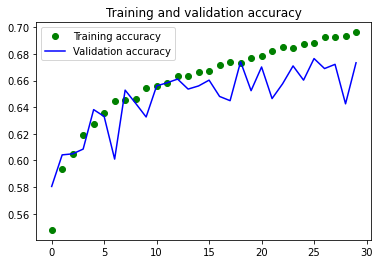

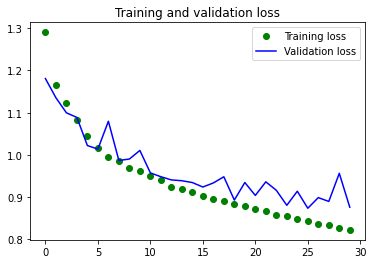

In [ ]:
from matplotlib import colors
import matplotlib.pyplot as plt   

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy', color='green')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss', color='green')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_true = tf.concat([labels_batch for data_batch, labels_batch in test_dataset_no_clahe], axis = 0)
y_true_cat = np.argmax(y_true, -1)

In [ ]:
def test_model(model):
  pred_Y = model.predict(test_dataset_no_clahe, verbose = True)
  pred_Y_cat = np.argmax(pred_Y, -1)
  print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(y_true_cat, pred_Y_cat)))
  print()
  print(classification_report(y_true_cat, pred_Y_cat))

  sns.heatmap(confusion_matrix(y_true_cat, pred_Y_cat), 
              annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

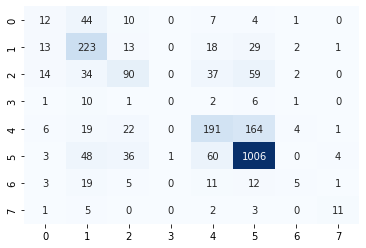

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model1_no_clahe.hdf5')
model.summary()
test_model(model)

In [ ]:
model.evaluate(test_dataset_no_clahe)

72/72 [==============================] - 8s 102ms/step - loss: 0.8864 - accuracy: 0.6755


[0.8863565325737, 0.6754501461982727]

### Second Model

In this second experiment we added the dropout with a rate of 0.5 before and after the dense layer.

In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 196
IMAGE_WIDTH = 196

In [ ]:
model2 = models.Sequential()
model2.add(layers.InputLayer(input_shape=(196, 196, 3)))
model2.add(data_augmentation)
model2.add(layers.Rescaling(1./255))   #each pixel in the range [0,1]

# 4 convolutional layers with zero-padding technique
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((3, 3)))

model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((5, 5)))   

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(8, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 196, 196, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model2)
class_weights = compute_class_weights()

In [ ]:
history = run_model(model, 'experiment_2', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/411           ETA: ?s - 

Epoch 1/30
411/411 [==============================] - ETA: 0s - loss: 3.0284 - accuracy: 0.2189
Epoch 1: val_loss improved from inf to 1.69643, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
411/411 [==============================] - 114s 273ms/step - loss: 3.0284 - accuracy: 0.2189 - val_loss: 1.6964 - val_accuracy: 0.1851
Epoch 2/30


0/411           ETA: ?s - 

Epoch 2/30
411/411 [==============================] - ETA: 0s - loss: 2.6196 - accuracy: 0.3535
Epoch 2: val_loss improved from 1.69643 to 1.55673, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
411/411 [==============================] - 113s 273ms/step - loss: 2.6196 - accuracy: 0.3535 - val_loss: 1.5567 - val_accuracy: 0.3842
Epoch 3/30


0/411           ETA: ?s - 

Epoch 3/30
411/411 [==============================] - ETA: 0s - loss: 2.4058 - accuracy: 0.4309
Epoch 3: val_loss did not improve from 1.55673
411/411 [==============================] - 113s 272ms/step - loss: 2.4058 - accuracy: 0.4309 - val_loss: 1.5963 - val_accuracy: 0.4215
Epoch 4/30


0/411           ETA: ?s - 

Epoch 4/30
411/411 [==============================] - ETA: 0s - loss: 2.2910 - accuracy: 0.4525
Epoch 4: val_loss improved from 1.55673 to 1.47015, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
411/411 [==============================] - 113s 272ms/step - loss: 2.2910 - accuracy: 0.4525 - val_loss: 1.4701 - val_accuracy: 0.4490
Epoch 5/30


0/411           ETA: ?s - 

Epoch 5/30
411/411 [==============================] - ETA: 0s - loss: 2.1973 - accuracy: 0.4630
Epoch 5: val_loss improved from 1.47015 to 1.31745, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
411/411 [==============================] - 113s 272ms/step - loss: 2.1973 - accuracy: 0.4630 - val_loss: 1.3174 - val_accuracy: 0.4857
Epoch 6/30


0/411           ETA: ?s - 

Epoch 6/30
411/411 [==============================] - ETA: 0s - loss: 2.1357 - accuracy: 0.4698
Epoch 6: val_loss did not improve from 1.31745
411/411 [==============================] - 112s 270ms/step - loss: 2.1357 - accuracy: 0.4698 - val_loss: 1.4098 - val_accuracy: 0.4524
Epoch 7/30


0/411           ETA: ?s - 

Epoch 7/30
411/411 [==============================] - ETA: 0s - loss: 2.0719 - accuracy: 0.4892
Epoch 7: val_loss did not improve from 1.31745
411/411 [==============================] - 112s 271ms/step - loss: 2.0719 - accuracy: 0.4892 - val_loss: 1.3682 - val_accuracy: 0.4843
Epoch 8/30


0/411           ETA: ?s - 

Epoch 8/30
411/411 [==============================] - ETA: 0s - loss: 2.0296 - accuracy: 0.4934
Epoch 8: val_loss improved from 1.31745 to 1.28256, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
411/411 [==============================] - 113s 273ms/step - loss: 2.0296 - accuracy: 0.4934 - val_loss: 1.2826 - val_accuracy: 0.4964
Epoch 9/30


0/411           ETA: ?s - 

Epoch 9/30
411/411 [==============================] - ETA: 0s - loss: 1.9967 - accuracy: 0.4991
Epoch 9: val_loss did not improve from 1.28256
411/411 [==============================] - 112s 271ms/step - loss: 1.9967 - accuracy: 0.4991 - val_loss: 1.2913 - val_accuracy: 0.5075
Epoch 10/30


0/411           ETA: ?s - 

Epoch 10/30
411/411 [==============================] - ETA: 0s - loss: 1.9563 - accuracy: 0.5070
Epoch 10: val_loss improved from 1.28256 to 1.27185, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
411/411 [==============================] - 113s 272ms/step - loss: 1.9563 - accuracy: 0.5070 - val_loss: 1.2718 - val_accuracy: 0.5283
Epoch 11/30


0/411           ETA: ?s - 

Epoch 11/30
411/411 [==============================] - ETA: 0s - loss: 1.9323 - accuracy: 0.5108
Epoch 11: val_loss did not improve from 1.27185
411/411 [==============================] - 112s 270ms/step - loss: 1.9323 - accuracy: 0.5108 - val_loss: 1.2796 - val_accuracy: 0.5268
Epoch 12/30


0/411           ETA: ?s - 

Epoch 12/30
411/411 [==============================] - ETA: 0s - loss: 1.9286 - accuracy: 0.5134
Epoch 12: val_loss did not improve from 1.27185
411/411 [==============================] - 112s 271ms/step - loss: 1.9286 - accuracy: 0.5134 - val_loss: 1.2768 - val_accuracy: 0.5128
Epoch 13/30


0/411           ETA: ?s - 

Epoch 13/30
411/411 [==============================] - ETA: 0s - loss: 1.8955 - accuracy: 0.5185
Epoch 13: val_loss improved from 1.27185 to 1.23939, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5
411/411 [==============================] - 113s 272ms/step - loss: 1.8955 - accuracy: 0.5185 - val_loss: 1.2394 - val_accuracy: 0.5404
Epoch 14/30


0/411           ETA: ?s - 

Epoch 14/30
411/411 [==============================] - ETA: 0s - loss: 1.8849 - accuracy: 0.5147
Epoch 14: val_loss did not improve from 1.23939
411/411 [==============================] - 112s 270ms/step - loss: 1.8849 - accuracy: 0.5147 - val_loss: 1.2437 - val_accuracy: 0.5181
Epoch 15/30


0/411           ETA: ?s - 

Epoch 15/30
411/411 [==============================] - ETA: 0s - loss: 1.8675 - accuracy: 0.5180
Epoch 15: val_loss did not improve from 1.23939
411/411 [==============================] - 112s 272ms/step - loss: 1.8675 - accuracy: 0.5180 - val_loss: 1.2863 - val_accuracy: 0.5070
Epoch 16/30


0/411           ETA: ?s - 

Epoch 16/30
411/411 [==============================] - ETA: 0s - loss: 1.8525 - accuracy: 0.5239
Epoch 16: val_loss did not improve from 1.23939
411/411 [==============================] - 112s 271ms/step - loss: 1.8525 - accuracy: 0.5239 - val_loss: 1.2669 - val_accuracy: 0.5138
Epoch 17/30


0/411           ETA: ?s - 

Epoch 17/30
411/411 [==============================] - ETA: 0s - loss: 1.8550 - accuracy: 0.5218
Epoch 17: val_loss did not improve from 1.23939
411/411 [==============================] - 112s 271ms/step - loss: 1.8550 - accuracy: 0.5218 - val_loss: 1.3431 - val_accuracy: 0.5104
Epoch 18/30


0/411           ETA: ?s - 

Epoch 18/30
411/411 [==============================] - ETA: 0s - loss: 1.8232 - accuracy: 0.5279
Epoch 18: val_loss did not improve from 1.23939
411/411 [==============================] - 112s 272ms/step - loss: 1.8232 - accuracy: 0.5279 - val_loss: 1.2950 - val_accuracy: 0.5060
Epoch 18: early stopping


59/59 [==============================] - 7s 104ms/step - loss: 1.2683 - accuracy: 0.5447
Test loss: 1.268
Test accuracy: 0.545
Precision: 0.3391697386953251
Recall: 0.33607838879576457
F1-Score: 0.3153863296146529
Accuracy on Test Data: 0.54%

              precision    recall  f1-score   support

           0       0.22      0.45      0.30        64
           1       0.63      0.34      0.44       248
           2       0.39      0.15      0.22       193
           3       0.00      0.00      0.00        17
           4       0.32      0.60      0.42       335
           5       0.76      0.71      0.73       946
           6       0.00      0.00      0.00        46
           7       0.40      0.44      0.42        18

    accuracy                           0.54      1867
   macro avg       0.34      0.34      0.32      1867
weighted avg       0.58      0.54      0.54      1867



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

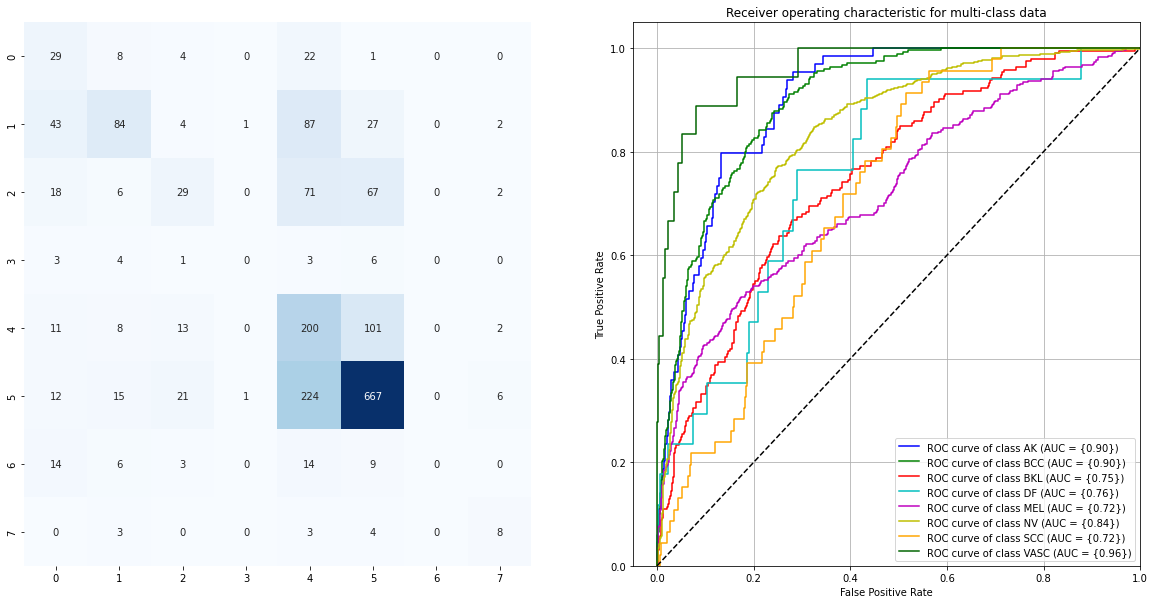

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_2.h5')
#model2.summary()
evaluate_model(model2)

In [ ]:
model2.evaluate(test_dataset)

59/59 [==============================] - 6s 105ms/step - loss: 1.2683 - accuracy: 0.5447


[1.2683289051055908, 0.54472416639328]

### Second Model Without Clahe

In this second experiment we added the dropout with a rate of 0.5 before and  after the dense layer.

In [ ]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 196
IMAGE_WIDTH = 196

In [ ]:
model2_nc = models.Sequential()
model2_nc.add(layers.InputLayer(input_shape=(196, 196, 3)))
model2_nc.add(data_augmentation)
model2_nc.add(layers.Rescaling(1./255))

model2_nc.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2_nc.add(layers.MaxPooling2D((2, 2)))

model2_nc.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2_nc.add(layers.MaxPooling2D((2, 2)))

model2_nc.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2_nc.add(layers.MaxPooling2D((3, 3)))

model2_nc.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2_nc.add(layers.MaxPooling2D((5, 5)))

model2_nc.add(layers.Flatten())
model2_nc.add(layers.Dropout(0.5))
model2_nc.add(layers.Dense(1024, activation='relu'))
model2_nc.add(layers.Dropout(0.5))
model2_nc.add(layers.Dense(8, activation='softmax'))

In [ ]:
model2_nc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model2_nc.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/Shareddrives/CIDL Project/Macrì, Tortora/models/CNN_From_Scratch/model2_no_clahe.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=5)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [ ]:
history = model2_nc.fit(training_dataset_no_clahe,
          validation_data=validation_dataset_no_clahe,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=30)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/642           ETA: ?s - 

Epoch 1/30
463/642 [====================>.........] - ETA: 13:09 - loss: 1.3804 - accuracy: 0.5184

KeyboardInterrupt: ignored

In [ ]:
def plot_model(history):
  '''
  show_training_and_validation_performance is used to plot the performances during the training phase
  :param history: object in which are recorded all the events
  '''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
plot_model(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

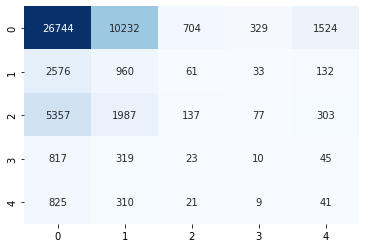

In [ ]:
model2 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model2.hdf5')
model2.summary()
test_model(model2)

### Third Model

In [ ]:
model3 = models.Sequential()
model3.add(layers.InputLayer(input_shape=(196, 196, 3)))
model3.add(data_augmentation)
model3.add(layers.Rescaling(1./255))

model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))

model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))

model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1024, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(8, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model3)
class_weights = compute_class_weights()

In [ ]:
history = run_model(model, 'experiment_3', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/411           ETA: ?s - 

Epoch 1/30
411/411 [==============================] - ETA: 0s - loss: 2.4855 - accuracy: 0.3341
Epoch 1: val_loss improved from inf to 1.40957, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 1886s 4s/step - loss: 2.4855 - accuracy: 0.3341 - val_loss: 1.4096 - val_accuracy: 0.4514
Epoch 2/30


0/411           ETA: ?s - 

Epoch 2/30
411/411 [==============================] - ETA: 0s - loss: 2.2137 - accuracy: 0.4229
Epoch 2: val_loss did not improve from 1.40957
411/411 [==============================] - 114s 275ms/step - loss: 2.2137 - accuracy: 0.4229 - val_loss: 1.4982 - val_accuracy: 0.4099
Epoch 3/30


0/411           ETA: ?s - 

Epoch 3/30
411/411 [==============================] - ETA: 0s - loss: 2.0432 - accuracy: 0.4653
Epoch 3: val_loss did not improve from 1.40957
411/411 [==============================] - 113s 273ms/step - loss: 2.0432 - accuracy: 0.4653 - val_loss: 1.4772 - val_accuracy: 0.4041
Epoch 4/30


0/411           ETA: ?s - 

Epoch 4/30
411/411 [==============================] - ETA: 0s - loss: 1.9228 - accuracy: 0.5026
Epoch 4: val_loss improved from 1.40957 to 1.39844, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 115s 278ms/step - loss: 1.9228 - accuracy: 0.5026 - val_loss: 1.3984 - val_accuracy: 0.4611
Epoch 5/30


0/411           ETA: ?s - 

Epoch 5/30
411/411 [==============================] - ETA: 0s - loss: 1.8530 - accuracy: 0.5183
Epoch 5: val_loss did not improve from 1.39844
411/411 [==============================] - 114s 274ms/step - loss: 1.8530 - accuracy: 0.5183 - val_loss: 1.4379 - val_accuracy: 0.4712
Epoch 6/30


0/411           ETA: ?s - 

Epoch 6/30
411/411 [==============================] - ETA: 0s - loss: 1.8005 - accuracy: 0.5391
Epoch 6: val_loss did not improve from 1.39844
411/411 [==============================] - 114s 274ms/step - loss: 1.8005 - accuracy: 0.5391 - val_loss: 1.4135 - val_accuracy: 0.4964
Epoch 7/30


0/411           ETA: ?s - 

Epoch 7/30
411/411 [==============================] - ETA: 0s - loss: 1.7773 - accuracy: 0.5413
Epoch 7: val_loss improved from 1.39844 to 1.33938, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 113s 273ms/step - loss: 1.7773 - accuracy: 0.5413 - val_loss: 1.3394 - val_accuracy: 0.5225
Epoch 8/30


0/411           ETA: ?s - 

Epoch 8/30
411/411 [==============================] - ETA: 0s - loss: 1.7480 - accuracy: 0.5462
Epoch 8: val_loss did not improve from 1.33938
411/411 [==============================] - 113s 274ms/step - loss: 1.7480 - accuracy: 0.5462 - val_loss: 1.4137 - val_accuracy: 0.5085
Epoch 9/30


0/411           ETA: ?s - 

Epoch 9/30
411/411 [==============================] - ETA: 0s - loss: 1.7233 - accuracy: 0.5504
Epoch 9: val_loss did not improve from 1.33938
411/411 [==============================] - 113s 272ms/step - loss: 1.7233 - accuracy: 0.5504 - val_loss: 1.3608 - val_accuracy: 0.5230
Epoch 10/30


0/411           ETA: ?s - 

Epoch 10/30
411/411 [==============================] - ETA: 0s - loss: 1.7067 - accuracy: 0.5542
Epoch 10: val_loss did not improve from 1.33938
411/411 [==============================] - 113s 274ms/step - loss: 1.7067 - accuracy: 0.5542 - val_loss: 1.3924 - val_accuracy: 0.5172
Epoch 11/30


0/411           ETA: ?s - 

Epoch 11/30
411/411 [==============================] - ETA: 0s - loss: 1.6792 - accuracy: 0.5601
Epoch 11: val_loss improved from 1.33938 to 1.32995, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 114s 276ms/step - loss: 1.6792 - accuracy: 0.5601 - val_loss: 1.3300 - val_accuracy: 0.5442
Epoch 12/30


0/411           ETA: ?s - 

Epoch 12/30
411/411 [==============================] - ETA: 0s - loss: 1.6630 - accuracy: 0.5661
Epoch 12: val_loss did not improve from 1.32995
411/411 [==============================] - 115s 278ms/step - loss: 1.6630 - accuracy: 0.5661 - val_loss: 1.4088 - val_accuracy: 0.5481
Epoch 13/30


0/411           ETA: ?s - 

Epoch 13/30
411/411 [==============================] - ETA: 0s - loss: 1.6542 - accuracy: 0.5660
Epoch 13: val_loss did not improve from 1.32995
411/411 [==============================] - 115s 278ms/step - loss: 1.6542 - accuracy: 0.5660 - val_loss: 1.4592 - val_accuracy: 0.5036
Epoch 14/30


0/411           ETA: ?s - 

Epoch 14/30
411/411 [==============================] - ETA: 0s - loss: 1.6369 - accuracy: 0.5657
Epoch 14: val_loss did not improve from 1.32995
411/411 [==============================] - 114s 276ms/step - loss: 1.6369 - accuracy: 0.5657 - val_loss: 1.3402 - val_accuracy: 0.5355
Epoch 15/30


0/411           ETA: ?s - 

Epoch 15/30
411/411 [==============================] - ETA: 0s - loss: 1.6316 - accuracy: 0.5688
Epoch 15: val_loss improved from 1.32995 to 1.28687, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 116s 279ms/step - loss: 1.6316 - accuracy: 0.5688 - val_loss: 1.2869 - val_accuracy: 0.5950
Epoch 16/30


0/411           ETA: ?s - 

Epoch 16/30
411/411 [==============================] - ETA: 0s - loss: 1.6150 - accuracy: 0.5752
Epoch 16: val_loss did not improve from 1.28687
411/411 [==============================] - 115s 277ms/step - loss: 1.6150 - accuracy: 0.5752 - val_loss: 1.4259 - val_accuracy: 0.5118
Epoch 17/30


0/411           ETA: ?s - 

Epoch 17/30
411/411 [==============================] - ETA: 0s - loss: 1.5929 - accuracy: 0.5756
Epoch 17: val_loss did not improve from 1.28687
411/411 [==============================] - 115s 278ms/step - loss: 1.5929 - accuracy: 0.5756 - val_loss: 1.4392 - val_accuracy: 0.5196
Epoch 18/30


0/411           ETA: ?s - 

Epoch 18/30
411/411 [==============================] - ETA: 0s - loss: 1.5973 - accuracy: 0.5781
Epoch 18: val_loss did not improve from 1.28687
411/411 [==============================] - 115s 277ms/step - loss: 1.5973 - accuracy: 0.5781 - val_loss: 1.5014 - val_accuracy: 0.5022
Epoch 19/30


0/411           ETA: ?s - 

Epoch 19/30
411/411 [==============================] - ETA: 0s - loss: 1.5626 - accuracy: 0.5845
Epoch 19: val_loss did not improve from 1.28687
411/411 [==============================] - 114s 276ms/step - loss: 1.5626 - accuracy: 0.5845 - val_loss: 1.5034 - val_accuracy: 0.5288
Epoch 20/30


0/411           ETA: ?s - 

Epoch 20/30
411/411 [==============================] - ETA: 0s - loss: 1.5534 - accuracy: 0.5867
Epoch 20: val_loss did not improve from 1.28687
411/411 [==============================] - 115s 277ms/step - loss: 1.5534 - accuracy: 0.5867 - val_loss: 1.4102 - val_accuracy: 0.5520
Epoch 20: early stopping


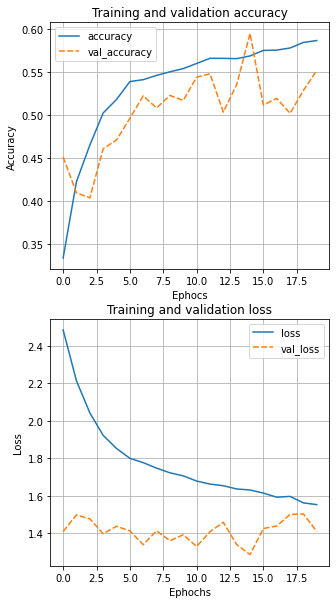

In [ ]:
plot_model_performance(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 194, 194, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

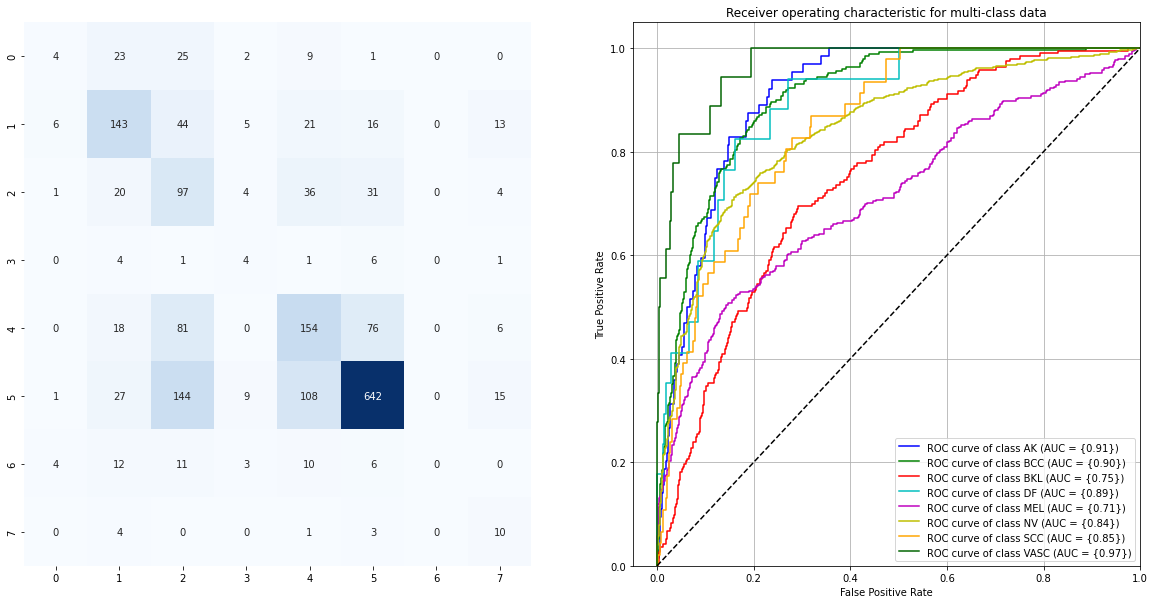

In [ ]:
model3 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5')
model3.summary()
evaluate_model(model3)

In [ ]:
model3.evaluate(test_dataset)

59/59 [==============================] - 9s 150ms/step - loss: 1.3482 - accuracy: 0.5645


[1.3481935262680054, 0.5645420551300049]

###Fourth model

In [ ]:
model4 = models.Sequential()
model4.add(layers.InputLayer(input_shape=(196, 196, 3)))
model4.add(data_augmentation)
model4.add(layers.Rescaling(1./255))

model4.add(layers.Conv2D(32, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(64, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(128, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((3, 3)))

model4.add(layers.Conv2D(128, (2, 2), activation='relu'))
model4.add(layers.MaxPooling2D((3, 3)))

model4.add(layers.Flatten())
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(2048, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(8, activation='softmax'))

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 196, 196, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 195, 195, 32)      416       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 96, 96, 64)        8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                  

In [ ]:
model = compile_model(model4)
class_weights = compute_class_weights()

In [ ]:
history = run_model(model, 'experiment_3', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/411           ETA: ?s - 

Epoch 1/30
411/411 [==============================] - ETA: 0s - loss: 2.5442 - accuracy: 0.3032
Epoch 1: val_loss improved from inf to 1.39271, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 1736s 4s/step - loss: 2.5442 - accuracy: 0.3032 - val_loss: 1.3927 - val_accuracy: 0.4780
Epoch 2/30


0/411           ETA: ?s - 

Epoch 2/30
411/411 [==============================] - ETA: 0s - loss: 2.2020 - accuracy: 0.4304
Epoch 2: val_loss improved from 1.39271 to 1.35220, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 113s 273ms/step - loss: 2.2020 - accuracy: 0.4304 - val_loss: 1.3522 - val_accuracy: 0.4853
Epoch 3/30


0/411           ETA: ?s - 

Epoch 3/30
411/411 [==============================] - ETA: 0s - loss: 2.0779 - accuracy: 0.4596
Epoch 3: val_loss did not improve from 1.35220
411/411 [==============================] - 112s 270ms/step - loss: 2.0779 - accuracy: 0.4596 - val_loss: 1.3977 - val_accuracy: 0.4717
Epoch 4/30


0/411           ETA: ?s - 

Epoch 4/30
411/411 [==============================] - ETA: 0s - loss: 1.9830 - accuracy: 0.4862
Epoch 4: val_loss improved from 1.35220 to 1.27945, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 113s 272ms/step - loss: 1.9830 - accuracy: 0.4862 - val_loss: 1.2794 - val_accuracy: 0.5495
Epoch 5/30


0/411           ETA: ?s - 

Epoch 5/30
411/411 [==============================] - ETA: 0s - loss: 1.9259 - accuracy: 0.5017
Epoch 5: val_loss did not improve from 1.27945
411/411 [==============================] - 112s 270ms/step - loss: 1.9259 - accuracy: 0.5017 - val_loss: 1.3574 - val_accuracy: 0.5114
Epoch 6/30


0/411           ETA: ?s - 

Epoch 6/30
411/411 [==============================] - ETA: 0s - loss: 1.8821 - accuracy: 0.5144
Epoch 6: val_loss improved from 1.27945 to 1.23790, saving model to /content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_3.h5
411/411 [==============================] - 113s 272ms/step - loss: 1.8821 - accuracy: 0.5144 - val_loss: 1.2379 - val_accuracy: 0.5819
Epoch 7/30


0/411           ETA: ?s - 

Epoch 7/30
411/411 [==============================] - ETA: 0s - loss: 1.8480 - accuracy: 0.5312
Epoch 7: val_loss did not improve from 1.23790
411/411 [==============================] - 112s 270ms/step - loss: 1.8480 - accuracy: 0.5312 - val_loss: 1.3098 - val_accuracy: 0.5428
Epoch 8/30


0/411           ETA: ?s - 

Epoch 8/30
411/411 [==============================] - ETA: 0s - loss: 1.8263 - accuracy: 0.5304
Epoch 8: val_loss did not improve from 1.23790
411/411 [==============================] - 112s 269ms/step - loss: 1.8263 - accuracy: 0.5304 - val_loss: 1.2546 - val_accuracy: 0.5756
Epoch 9/30


0/411           ETA: ?s - 

Epoch 9/30
411/411 [==============================] - ETA: 0s - loss: 1.8075 - accuracy: 0.5361
Epoch 9: val_loss did not improve from 1.23790
411/411 [==============================] - 111s 268ms/step - loss: 1.8075 - accuracy: 0.5361 - val_loss: 1.2764 - val_accuracy: 0.5723
Epoch 10/30


0/411           ETA: ?s - 

Epoch 10/30
411/411 [==============================] - ETA: 0s - loss: 1.7893 - accuracy: 0.5424
Epoch 10: val_loss did not improve from 1.23790
411/411 [==============================] - 111s 268ms/step - loss: 1.7893 - accuracy: 0.5424 - val_loss: 1.2909 - val_accuracy: 0.5732
Epoch 11/30


0/411           ETA: ?s - 

Epoch 11/30
411/411 [==============================] - ETA: 0s - loss: 1.7641 - accuracy: 0.5454
Epoch 11: val_loss did not improve from 1.23790
411/411 [==============================] - 111s 268ms/step - loss: 1.7641 - accuracy: 0.5454 - val_loss: 1.2467 - val_accuracy: 0.5776
Epoch 11: early stopping


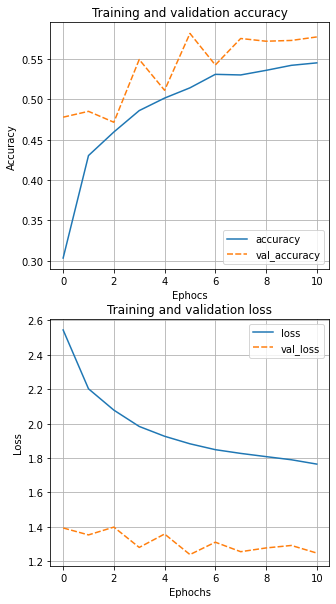

In [ ]:
plot_model_performance(history)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 196, 196, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 195, 195, 32)      416       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 96, 96, 64)        8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

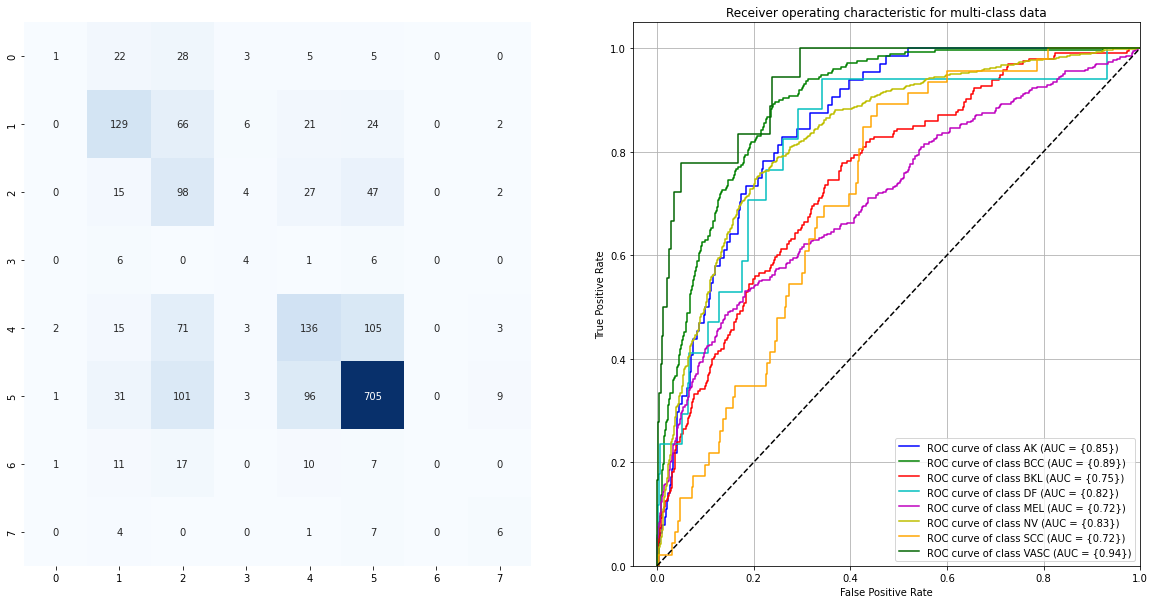

In [ ]:
model4 = load_model('/content/drive/Shareddrives/CIDL Project/Macrì,Tortora/models/CNN_From_Scratch/experiment_4.h5')
model4.summary()
evaluate_model(model4)

### Fifth Model

In [10]:
model5 = models.Sequential()
model5.add(layers.InputLayer(input_shape=(196, 196, 3)))
model5.add(data_augmentation)
model5.add(layers.Rescaling(1./255))
model5.add(layers.Conv2D(32, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(64, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(128, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((3, 3)))

model5.add(layers.Conv2D(256, (2, 2), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((3, 3)))

model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(8, activation='softmax'))

In [11]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 196, 196, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 196, 196, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 195, 195, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 195, 195, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)       

In [12]:
model = compile_model(model5)
class_weights = compute_class_weights()

In [ ]:
history = run_model(model, 'experiment_5', training_dataset, validation_dataset, MODELS_FOLDER, class_weights)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/411           ETA: ?s - 

Epoch 1/30
109/411 [======>.......................] - ETA: 33:11 - loss: 3.3510 - accuracy: 0.3693

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 batch_normalization (BatchN  (None, 223, 223, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


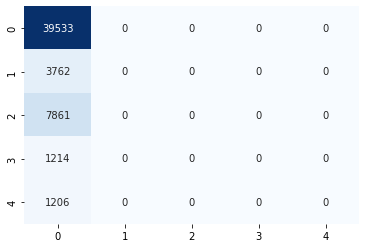

In [ ]:
model5 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model5.hdf5')
model5.summary()
test_model(model5)

### Sixth Model

In [ ]:
!unzip -q "/content/drive/Shareddrives/DeepLearningProject/trainingSetALL.zip" -d "/"

In [ ]:
training_dir = PATH = '/content/trainingSetALL/'

training_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  subset="training",
  seed=123,
  validation_split=0.2,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  subset="validation",
  seed=123,
  validation_split=0.2,
  label_mode="categorical",
  labels="inferred",
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

Found 35124 files belonging to 5 classes.
Using 28100 files for training.
Found 35124 files belonging to 5 classes.
Using 7024 files for validation.


In [ ]:
data_augmentation = keras.Sequential(
  [
  layers.RandomFlip("vertical"),
  layers.RandomFlip("horizontal"),
  layers.RandomZoom(0.1, fill_mode="constant", fill_value=0.0),
  layers.RandomRotation(factor=1, fill_mode="constant", fill_value=0.0),
  ]
)

In [ ]:
model6 = models.Sequential()
model6.add(layers.InputLayer(input_shape=(224, 224, 3)))
model6.add(data_augmentation)
model6.add(layers.Rescaling(1./255))


model6.add(layers.Conv2D(32, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(64, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))

model6.add(layers.Conv2D(128, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Conv2D(256, (2, 2), activation='relu'))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Flatten())
model6.add(layers.Dense(512, activation='relu'))
model6.add(layers.Dense(5, activation='softmax'))

In [ ]:
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model6.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model6.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=150)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Training:   0%|           0/150 ETA: ?s,  ?epochs/s

Epoch 1/150


0/281           ETA: ?s - 

Epoch 1/150
281/281 [==============================] - ETA: 0s - loss: 0.8964 - accuracy: 0.7318
Epoch 1: val_loss improved from inf to 0.86631, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 240s 802ms/step - loss: 0.8964 - accuracy: 0.7318 - val_loss: 0.8663 - val_accuracy: 0.7390
Epoch 2/150


0/281           ETA: ?s - 

Epoch 2/150
281/281 [==============================] - ETA: 0s - loss: 0.8667 - accuracy: 0.7337
Epoch 2: val_loss improved from 0.86631 to 0.85469, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 226s 796ms/step - loss: 0.8667 - accuracy: 0.7337 - val_loss: 0.8547 - val_accuracy: 0.7390
Epoch 3/150


0/281           ETA: ?s - 

Epoch 3/150
281/281 [==============================] - ETA: 0s - loss: 0.8620 - accuracy: 0.7337
Epoch 3: val_loss did not improve from 0.85469
281/281 [==============================] - 225s 793ms/step - loss: 0.8620 - accuracy: 0.7337 - val_loss: 0.8554 - val_accuracy: 0.7390
Epoch 4/150


0/281           ETA: ?s - 

Epoch 4/150
281/281 [==============================] - ETA: 0s - loss: 0.8576 - accuracy: 0.7337
Epoch 4: val_loss did not improve from 0.85469
281/281 [==============================] - 224s 791ms/step - loss: 0.8576 - accuracy: 0.7337 - val_loss: 0.8583 - val_accuracy: 0.7390
Epoch 5/150


0/281           ETA: ?s - 

Epoch 5/150
281/281 [==============================] - ETA: 0s - loss: 0.8567 - accuracy: 0.7337
Epoch 5: val_loss did not improve from 0.85469
281/281 [==============================] - 224s 790ms/step - loss: 0.8567 - accuracy: 0.7337 - val_loss: 0.8671 - val_accuracy: 0.7390
Epoch 6/150


0/281           ETA: ?s - 

Epoch 6/150
281/281 [==============================] - ETA: 0s - loss: 0.8536 - accuracy: 0.7337
Epoch 6: val_loss improved from 0.85469 to 0.85146, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 792ms/step - loss: 0.8536 - accuracy: 0.7337 - val_loss: 0.8515 - val_accuracy: 0.7390
Epoch 7/150


0/281           ETA: ?s - 

Epoch 7/150
281/281 [==============================] - ETA: 0s - loss: 0.8531 - accuracy: 0.7337
Epoch 7: val_loss did not improve from 0.85146
281/281 [==============================] - 224s 789ms/step - loss: 0.8531 - accuracy: 0.7337 - val_loss: 0.8656 - val_accuracy: 0.7390
Epoch 8/150


0/281           ETA: ?s - 

Epoch 8/150
281/281 [==============================] - ETA: 0s - loss: 0.8498 - accuracy: 0.7337
Epoch 8: val_loss improved from 0.85146 to 0.83842, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 792ms/step - loss: 0.8498 - accuracy: 0.7337 - val_loss: 0.8384 - val_accuracy: 0.7390
Epoch 9/150


0/281           ETA: ?s - 

Epoch 9/150
281/281 [==============================] - ETA: 0s - loss: 0.8470 - accuracy: 0.7337
Epoch 9: val_loss did not improve from 0.83842
281/281 [==============================] - 224s 788ms/step - loss: 0.8470 - accuracy: 0.7337 - val_loss: 0.8517 - val_accuracy: 0.7390
Epoch 10/150


0/281           ETA: ?s - 

Epoch 10/150
281/281 [==============================] - ETA: 0s - loss: 0.8442 - accuracy: 0.7337
Epoch 10: val_loss improved from 0.83842 to 0.83613, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 791ms/step - loss: 0.8442 - accuracy: 0.7337 - val_loss: 0.8361 - val_accuracy: 0.7390
Epoch 11/150


0/281           ETA: ?s - 

Epoch 11/150
281/281 [==============================] - ETA: 0s - loss: 0.8420 - accuracy: 0.7337
Epoch 11: val_loss did not improve from 0.83613
281/281 [==============================] - 223s 787ms/step - loss: 0.8420 - accuracy: 0.7337 - val_loss: 0.8431 - val_accuracy: 0.7390
Epoch 12/150


0/281           ETA: ?s - 

Epoch 12/150
281/281 [==============================] - ETA: 0s - loss: 0.8407 - accuracy: 0.7337
Epoch 12: val_loss did not improve from 0.83613
281/281 [==============================] - 223s 786ms/step - loss: 0.8407 - accuracy: 0.7337 - val_loss: 0.8394 - val_accuracy: 0.7390
Epoch 13/150


0/281           ETA: ?s - 

Epoch 13/150
281/281 [==============================] - ETA: 0s - loss: 0.8356 - accuracy: 0.7337
Epoch 13: val_loss did not improve from 0.83613
281/281 [==============================] - 224s 787ms/step - loss: 0.8356 - accuracy: 0.7337 - val_loss: 0.8418 - val_accuracy: 0.7390
Epoch 14/150


0/281           ETA: ?s - 

Epoch 14/150
281/281 [==============================] - ETA: 0s - loss: 0.8347 - accuracy: 0.7338
Epoch 14: val_loss did not improve from 0.83613
281/281 [==============================] - 223s 786ms/step - loss: 0.8347 - accuracy: 0.7338 - val_loss: 0.8589 - val_accuracy: 0.7389
Epoch 15/150


0/281           ETA: ?s - 

Epoch 15/150
281/281 [==============================] - ETA: 0s - loss: 0.8323 - accuracy: 0.7338
Epoch 15: val_loss improved from 0.83613 to 0.82956, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 788ms/step - loss: 0.8323 - accuracy: 0.7338 - val_loss: 0.8296 - val_accuracy: 0.7390
Epoch 16/150


0/281           ETA: ?s - 

Epoch 16/150
281/281 [==============================] - ETA: 0s - loss: 0.8293 - accuracy: 0.7338
Epoch 16: val_loss did not improve from 0.82956
281/281 [==============================] - 223s 786ms/step - loss: 0.8293 - accuracy: 0.7338 - val_loss: 0.8405 - val_accuracy: 0.7389
Epoch 17/150


0/281           ETA: ?s - 

Epoch 17/150
281/281 [==============================] - ETA: 0s - loss: 0.8239 - accuracy: 0.7339
Epoch 17: val_loss improved from 0.82956 to 0.82896, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.8239 - accuracy: 0.7339 - val_loss: 0.8290 - val_accuracy: 0.7392
Epoch 18/150


0/281           ETA: ?s - 

Epoch 18/150
281/281 [==============================] - ETA: 0s - loss: 0.8214 - accuracy: 0.7341
Epoch 18: val_loss improved from 0.82896 to 0.81451, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.8214 - accuracy: 0.7341 - val_loss: 0.8145 - val_accuracy: 0.7389
Epoch 19/150


0/281           ETA: ?s - 

Epoch 19/150
281/281 [==============================] - ETA: 0s - loss: 0.8190 - accuracy: 0.7339
Epoch 19: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8190 - accuracy: 0.7339 - val_loss: 0.8403 - val_accuracy: 0.7390
Epoch 20/150


0/281           ETA: ?s - 

Epoch 20/150
281/281 [==============================] - ETA: 0s - loss: 0.8170 - accuracy: 0.7338
Epoch 20: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8170 - accuracy: 0.7338 - val_loss: 0.8518 - val_accuracy: 0.7389
Epoch 21/150


0/281           ETA: ?s - 

Epoch 21/150
281/281 [==============================] - ETA: 0s - loss: 0.8111 - accuracy: 0.7344
Epoch 21: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 789ms/step - loss: 0.8111 - accuracy: 0.7344 - val_loss: 0.8381 - val_accuracy: 0.7389
Epoch 22/150


0/281           ETA: ?s - 

Epoch 22/150
281/281 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.7342
Epoch 22: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 790ms/step - loss: 0.8067 - accuracy: 0.7342 - val_loss: 0.8325 - val_accuracy: 0.7388
Epoch 23/150


0/281           ETA: ?s - 

Epoch 23/150
281/281 [==============================] - ETA: 0s - loss: 0.8033 - accuracy: 0.7344
Epoch 23: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8033 - accuracy: 0.7344 - val_loss: 0.8404 - val_accuracy: 0.7389
Epoch 24/150


0/281           ETA: ?s - 

Epoch 24/150
281/281 [==============================] - ETA: 0s - loss: 0.8001 - accuracy: 0.7354
Epoch 24: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 788ms/step - loss: 0.8001 - accuracy: 0.7354 - val_loss: 0.8922 - val_accuracy: 0.7389
Epoch 25/150


0/281           ETA: ?s - 

Epoch 25/150
281/281 [==============================] - ETA: 0s - loss: 0.7968 - accuracy: 0.7359
Epoch 25: val_loss did not improve from 0.81451
281/281 [==============================] - 224s 787ms/step - loss: 0.7968 - accuracy: 0.7359 - val_loss: 0.8362 - val_accuracy: 0.7389
Epoch 26/150


0/281           ETA: ?s - 

Epoch 26/150
281/281 [==============================] - ETA: 0s - loss: 0.7909 - accuracy: 0.7360
Epoch 26: val_loss did not improve from 0.81451
281/281 [==============================] - 223s 785ms/step - loss: 0.7909 - accuracy: 0.7360 - val_loss: 0.8723 - val_accuracy: 0.7393
Epoch 27/150


0/281           ETA: ?s - 

Epoch 27/150
281/281 [==============================] - ETA: 0s - loss: 0.7882 - accuracy: 0.7369
Epoch 27: val_loss did not improve from 0.81451
281/281 [==============================] - 223s 787ms/step - loss: 0.7882 - accuracy: 0.7369 - val_loss: 0.8584 - val_accuracy: 0.7392
Epoch 28/150


0/281           ETA: ?s - 

Epoch 28/150
281/281 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.7366
Epoch 28: val_loss did not improve from 0.81451
281/281 [==============================] - 223s 786ms/step - loss: 0.7856 - accuracy: 0.7366 - val_loss: 0.8409 - val_accuracy: 0.7393
Epoch 29/150


0/281           ETA: ?s - 

Epoch 29/150
281/281 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.7381
Epoch 29: val_loss improved from 0.81451 to 0.81437, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 794ms/step - loss: 0.7856 - accuracy: 0.7381 - val_loss: 0.8144 - val_accuracy: 0.7397
Epoch 30/150


0/281           ETA: ?s - 

Epoch 30/150
281/281 [==============================] - ETA: 0s - loss: 0.7787 - accuracy: 0.7380
Epoch 30: val_loss improved from 0.81437 to 0.81271, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 791ms/step - loss: 0.7787 - accuracy: 0.7380 - val_loss: 0.8127 - val_accuracy: 0.7388
Epoch 31/150


0/281           ETA: ?s - 

Epoch 31/150
281/281 [==============================] - ETA: 0s - loss: 0.7765 - accuracy: 0.7391
Epoch 31: val_loss did not improve from 0.81271
281/281 [==============================] - 224s 788ms/step - loss: 0.7765 - accuracy: 0.7391 - val_loss: 0.8140 - val_accuracy: 0.7396
Epoch 32/150


0/281           ETA: ?s - 

Epoch 32/150
281/281 [==============================] - ETA: 0s - loss: 0.7746 - accuracy: 0.7402
Epoch 32: val_loss did not improve from 0.81271
281/281 [==============================] - 224s 790ms/step - loss: 0.7746 - accuracy: 0.7402 - val_loss: 0.8452 - val_accuracy: 0.7396
Epoch 33/150


0/281           ETA: ?s - 

Epoch 33/150
281/281 [==============================] - ETA: 0s - loss: 0.7706 - accuracy: 0.7405
Epoch 33: val_loss did not improve from 0.81271
281/281 [==============================] - 224s 790ms/step - loss: 0.7706 - accuracy: 0.7405 - val_loss: 0.8705 - val_accuracy: 0.7399
Epoch 34/150


0/281           ETA: ?s - 

Epoch 34/150
281/281 [==============================] - ETA: 0s - loss: 0.7695 - accuracy: 0.7420
Epoch 34: val_loss improved from 0.81271 to 0.80481, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 791ms/step - loss: 0.7695 - accuracy: 0.7420 - val_loss: 0.8048 - val_accuracy: 0.7395
Epoch 35/150


0/281           ETA: ?s - 

Epoch 35/150
281/281 [==============================] - ETA: 0s - loss: 0.7667 - accuracy: 0.7415
Epoch 35: val_loss did not improve from 0.80481
281/281 [==============================] - 224s 789ms/step - loss: 0.7667 - accuracy: 0.7415 - val_loss: 0.8244 - val_accuracy: 0.7397
Epoch 36/150


0/281           ETA: ?s - 

Epoch 36/150
281/281 [==============================] - ETA: 0s - loss: 0.7637 - accuracy: 0.7427
Epoch 36: val_loss did not improve from 0.80481
281/281 [==============================] - 224s 789ms/step - loss: 0.7637 - accuracy: 0.7427 - val_loss: 0.8404 - val_accuracy: 0.7406
Epoch 37/150


0/281           ETA: ?s - 

Epoch 37/150
281/281 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.7430
Epoch 37: val_loss did not improve from 0.80481
281/281 [==============================] - 224s 788ms/step - loss: 0.7604 - accuracy: 0.7430 - val_loss: 0.8205 - val_accuracy: 0.7410
Epoch 38/150


0/281           ETA: ?s - 

Epoch 38/150
281/281 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.7435
Epoch 38: val_loss improved from 0.80481 to 0.79994, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 225s 792ms/step - loss: 0.7604 - accuracy: 0.7435 - val_loss: 0.7999 - val_accuracy: 0.7423
Epoch 39/150


0/281           ETA: ?s - 

Epoch 39/150
281/281 [==============================] - ETA: 0s - loss: 0.7579 - accuracy: 0.7442
Epoch 39: val_loss did not improve from 0.79994
281/281 [==============================] - 224s 789ms/step - loss: 0.7579 - accuracy: 0.7442 - val_loss: 0.8059 - val_accuracy: 0.7416
Epoch 40/150


0/281           ETA: ?s - 

Epoch 40/150
281/281 [==============================] - ETA: 0s - loss: 0.7538 - accuracy: 0.7446
Epoch 40: val_loss improved from 0.79994 to 0.79758, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.7538 - accuracy: 0.7446 - val_loss: 0.7976 - val_accuracy: 0.7419
Epoch 41/150


0/281           ETA: ?s - 

Epoch 41/150
281/281 [==============================] - ETA: 0s - loss: 0.7532 - accuracy: 0.7452
Epoch 41: val_loss improved from 0.79758 to 0.79194, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 224s 790ms/step - loss: 0.7532 - accuracy: 0.7452 - val_loss: 0.7919 - val_accuracy: 0.7426
Epoch 42/150


0/281           ETA: ?s - 

Epoch 42/150
281/281 [==============================] - ETA: 0s - loss: 0.7490 - accuracy: 0.7464
Epoch 42: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 788ms/step - loss: 0.7490 - accuracy: 0.7464 - val_loss: 0.8234 - val_accuracy: 0.7419
Epoch 43/150


0/281           ETA: ?s - 

Epoch 43/150
281/281 [==============================] - ETA: 0s - loss: 0.7488 - accuracy: 0.7472
Epoch 43: val_loss did not improve from 0.79194
281/281 [==============================] - 223s 786ms/step - loss: 0.7488 - accuracy: 0.7472 - val_loss: 0.8151 - val_accuracy: 0.7419
Epoch 44/150


0/281           ETA: ?s - 

Epoch 44/150
281/281 [==============================] - ETA: 0s - loss: 0.7501 - accuracy: 0.7469
Epoch 44: val_loss did not improve from 0.79194
281/281 [==============================] - 225s 791ms/step - loss: 0.7501 - accuracy: 0.7469 - val_loss: 0.8477 - val_accuracy: 0.7405
Epoch 45/150


0/281           ETA: ?s - 

Epoch 45/150
281/281 [==============================] - ETA: 0s - loss: 0.7454 - accuracy: 0.7472
Epoch 45: val_loss did not improve from 0.79194
281/281 [==============================] - 225s 791ms/step - loss: 0.7454 - accuracy: 0.7472 - val_loss: 0.8106 - val_accuracy: 0.7422
Epoch 46/150


0/281           ETA: ?s - 

Epoch 46/150
281/281 [==============================] - ETA: 0s - loss: 0.7446 - accuracy: 0.7477
Epoch 46: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 789ms/step - loss: 0.7446 - accuracy: 0.7477 - val_loss: 0.8013 - val_accuracy: 0.7432
Epoch 47/150


0/281           ETA: ?s - 

Epoch 47/150
281/281 [==============================] - ETA: 0s - loss: 0.7384 - accuracy: 0.7501
Epoch 47: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 788ms/step - loss: 0.7384 - accuracy: 0.7501 - val_loss: 0.8014 - val_accuracy: 0.7442
Epoch 48/150


0/281           ETA: ?s - 

Epoch 48/150
281/281 [==============================] - ETA: 0s - loss: 0.7410 - accuracy: 0.7484
Epoch 48: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 790ms/step - loss: 0.7410 - accuracy: 0.7484 - val_loss: 0.8281 - val_accuracy: 0.7420
Epoch 49/150


0/281           ETA: ?s - 

Epoch 49/150
281/281 [==============================] - ETA: 0s - loss: 0.7367 - accuracy: 0.7489
Epoch 49: val_loss did not improve from 0.79194
281/281 [==============================] - 224s 790ms/step - loss: 0.7367 - accuracy: 0.7489 - val_loss: 0.8231 - val_accuracy: 0.7432
Epoch 50/150


0/281           ETA: ?s - 

Epoch 50/150
281/281 [==============================] - ETA: 0s - loss: 0.7358 - accuracy: 0.7493
Epoch 50: val_loss improved from 0.79194 to 0.79059, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 226s 795ms/step - loss: 0.7358 - accuracy: 0.7493 - val_loss: 0.7906 - val_accuracy: 0.7460
Epoch 51/150


0/281           ETA: ?s - 

Epoch 51/150
281/281 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.7504
Epoch 51: val_loss improved from 0.79059 to 0.77377, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5
281/281 [==============================] - 226s 795ms/step - loss: 0.7323 - accuracy: 0.7504 - val_loss: 0.7738 - val_accuracy: 0.7472
Epoch 52/150


0/281           ETA: ?s - 

Epoch 52/150
281/281 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.7517
Epoch 52: val_loss did not improve from 0.77377
281/281 [==============================] - 225s 792ms/step - loss: 0.7323 - accuracy: 0.7517 - val_loss: 0.7888 - val_accuracy: 0.7452
Epoch 53/150


0/281           ETA: ?s - 

Epoch 53/150
281/281 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.7512
Epoch 53: val_loss did not improve from 0.77377
281/281 [==============================] - 225s 791ms/step - loss: 0.7291 - accuracy: 0.7512 - val_loss: 0.7796 - val_accuracy: 0.7462
Epoch 54/150


0/281           ETA: ?s - 

Epoch 54/150
281/281 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.7525
Epoch 54: val_loss did not improve from 0.77377
281/281 [==============================] - 225s 791ms/step - loss: 0.7291 - accuracy: 0.7525 - val_loss: 0.7786 - val_accuracy: 0.7477
Epoch 55/150


0/281           ETA: ?s - 

Epoch 55/150
240/281 [========================>.....] - ETA: 29s - loss: 0.7296 - accuracy: 0.7514

In [ ]:
#resume training after Colab disconnection
model6 = load_model('/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model6.hdf5')
model6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                  

Training:   0%|           0/80 ETA: ?s,  ?epochs/s

Epoch 1/80


0/281           ETA: ?s - 

Epoch 1/80
281/281 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.7501
Epoch 1: val_loss improved from inf to 0.82102, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 133s 456ms/step - loss: 0.7323 - accuracy: 0.7501 - val_loss: 0.8210 - val_accuracy: 0.7436
Epoch 2/80


0/281           ETA: ?s - 

Epoch 2/80
281/281 [==============================] - ETA: 0s - loss: 0.7297 - accuracy: 0.7521
Epoch 2: val_loss improved from 0.82102 to 0.80039, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 128s 449ms/step - loss: 0.7297 - accuracy: 0.7521 - val_loss: 0.8004 - val_accuracy: 0.7457
Epoch 3/80


0/281           ETA: ?s - 

Epoch 3/80
281/281 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.7510
Epoch 3: val_loss improved from 0.80039 to 0.80024, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 128s 447ms/step - loss: 0.7289 - accuracy: 0.7510 - val_loss: 0.8002 - val_accuracy: 0.7456
Epoch 4/80


0/281           ETA: ?s - 

Epoch 4/80
281/281 [==============================] - ETA: 0s - loss: 0.7297 - accuracy: 0.7530
Epoch 4: val_loss improved from 0.80024 to 0.79767, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 447ms/step - loss: 0.7297 - accuracy: 0.7530 - val_loss: 0.7977 - val_accuracy: 0.7449
Epoch 5/80


0/281           ETA: ?s - 

Epoch 5/80
281/281 [==============================] - ETA: 0s - loss: 0.7243 - accuracy: 0.7531
Epoch 5: val_loss improved from 0.79767 to 0.78290, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.7243 - accuracy: 0.7531 - val_loss: 0.7829 - val_accuracy: 0.7467
Epoch 6/80


0/281           ETA: ?s - 

Epoch 6/80
281/281 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.7520
Epoch 6: val_loss improved from 0.78290 to 0.77959, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.7266 - accuracy: 0.7520 - val_loss: 0.7796 - val_accuracy: 0.7473
Epoch 7/80


0/281           ETA: ?s - 

Epoch 7/80
281/281 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.7527
Epoch 7: val_loss improved from 0.77959 to 0.77656, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 443ms/step - loss: 0.7266 - accuracy: 0.7527 - val_loss: 0.7766 - val_accuracy: 0.7483
Epoch 8/80


0/281           ETA: ?s - 

Epoch 8/80
281/281 [==============================] - ETA: 0s - loss: 0.7192 - accuracy: 0.7546
Epoch 8: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 442ms/step - loss: 0.7192 - accuracy: 0.7546 - val_loss: 0.7855 - val_accuracy: 0.7483
Epoch 9/80


0/281           ETA: ?s - 

Epoch 9/80
281/281 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.7546
Epoch 9: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 442ms/step - loss: 0.7215 - accuracy: 0.7546 - val_loss: 0.7889 - val_accuracy: 0.7466
Epoch 10/80


0/281           ETA: ?s - 

Epoch 10/80
281/281 [==============================] - ETA: 0s - loss: 0.7210 - accuracy: 0.7550
Epoch 10: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 440ms/step - loss: 0.7210 - accuracy: 0.7550 - val_loss: 0.7767 - val_accuracy: 0.7483
Epoch 11/80


0/281           ETA: ?s - 

Epoch 11/80
281/281 [==============================] - ETA: 0s - loss: 0.7184 - accuracy: 0.7553
Epoch 11: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 441ms/step - loss: 0.7184 - accuracy: 0.7553 - val_loss: 0.7802 - val_accuracy: 0.7480
Epoch 12/80


0/281           ETA: ?s - 

Epoch 12/80
281/281 [==============================] - ETA: 0s - loss: 0.7177 - accuracy: 0.7551
Epoch 12: val_loss did not improve from 0.77656
281/281 [==============================] - 126s 441ms/step - loss: 0.7177 - accuracy: 0.7551 - val_loss: 0.7771 - val_accuracy: 0.7490
Epoch 13/80


0/281           ETA: ?s - 

Epoch 13/80
281/281 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.7556
Epoch 13: val_loss improved from 0.77656 to 0.77377, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 442ms/step - loss: 0.7150 - accuracy: 0.7556 - val_loss: 0.7738 - val_accuracy: 0.7497
Epoch 14/80


0/281           ETA: ?s - 

Epoch 14/80
281/281 [==============================] - ETA: 0s - loss: 0.7171 - accuracy: 0.7537
Epoch 14: val_loss did not improve from 0.77377
281/281 [==============================] - 125s 440ms/step - loss: 0.7171 - accuracy: 0.7537 - val_loss: 0.7824 - val_accuracy: 0.7494
Epoch 15/80


0/281           ETA: ?s - 

Epoch 15/80
281/281 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.7556
Epoch 15: val_loss did not improve from 0.77377
281/281 [==============================] - 126s 441ms/step - loss: 0.7152 - accuracy: 0.7556 - val_loss: 0.7789 - val_accuracy: 0.7509
Epoch 16/80


0/281           ETA: ?s - 

Epoch 16/80
281/281 [==============================] - ETA: 0s - loss: 0.7122 - accuracy: 0.7577
Epoch 16: val_loss did not improve from 0.77377
281/281 [==============================] - 126s 442ms/step - loss: 0.7122 - accuracy: 0.7577 - val_loss: 0.7743 - val_accuracy: 0.7470
Epoch 17/80


0/281           ETA: ?s - 

Epoch 17/80
281/281 [==============================] - ETA: 0s - loss: 0.7126 - accuracy: 0.7578
Epoch 17: val_loss did not improve from 0.77377
281/281 [==============================] - 126s 441ms/step - loss: 0.7126 - accuracy: 0.7578 - val_loss: 0.7853 - val_accuracy: 0.7496
Epoch 18/80


0/281           ETA: ?s - 

Epoch 18/80
281/281 [==============================] - ETA: 0s - loss: 0.7150 - accuracy: 0.7557
Epoch 18: val_loss improved from 0.77377 to 0.77026, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 443ms/step - loss: 0.7150 - accuracy: 0.7557 - val_loss: 0.7703 - val_accuracy: 0.7507
Epoch 19/80


0/281           ETA: ?s - 

Epoch 19/80
281/281 [==============================] - ETA: 0s - loss: 0.7098 - accuracy: 0.7573
Epoch 19: val_loss did not improve from 0.77026
281/281 [==============================] - 125s 439ms/step - loss: 0.7098 - accuracy: 0.7573 - val_loss: 0.7792 - val_accuracy: 0.7494
Epoch 20/80


0/281           ETA: ?s - 

Epoch 20/80
281/281 [==============================] - ETA: 0s - loss: 0.7095 - accuracy: 0.7564
Epoch 20: val_loss improved from 0.77026 to 0.76222, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 441ms/step - loss: 0.7095 - accuracy: 0.7564 - val_loss: 0.7622 - val_accuracy: 0.7496
Epoch 21/80


0/281           ETA: ?s - 

Epoch 21/80
281/281 [==============================] - ETA: 0s - loss: 0.7088 - accuracy: 0.7561
Epoch 21: val_loss did not improve from 0.76222
281/281 [==============================] - 126s 440ms/step - loss: 0.7088 - accuracy: 0.7561 - val_loss: 0.7694 - val_accuracy: 0.7514
Epoch 22/80


0/281           ETA: ?s - 

Epoch 22/80
281/281 [==============================] - ETA: 0s - loss: 0.7093 - accuracy: 0.7568
Epoch 22: val_loss did not improve from 0.76222
281/281 [==============================] - 125s 438ms/step - loss: 0.7093 - accuracy: 0.7568 - val_loss: 0.7902 - val_accuracy: 0.7490
Epoch 23/80


0/281           ETA: ?s - 

Epoch 23/80
281/281 [==============================] - ETA: 0s - loss: 0.7055 - accuracy: 0.7594
Epoch 23: val_loss did not improve from 0.76222
281/281 [==============================] - 125s 438ms/step - loss: 0.7055 - accuracy: 0.7594 - val_loss: 0.7641 - val_accuracy: 0.7511
Epoch 24/80


0/281           ETA: ?s - 

Epoch 24/80
281/281 [==============================] - ETA: 0s - loss: 0.7046 - accuracy: 0.7594
Epoch 24: val_loss did not improve from 0.76222
281/281 [==============================] - 130s 455ms/step - loss: 0.7046 - accuracy: 0.7594 - val_loss: 0.7812 - val_accuracy: 0.7500
Epoch 25/80


0/281           ETA: ?s - 

Epoch 25/80
281/281 [==============================] - ETA: 0s - loss: 0.7021 - accuracy: 0.7584
Epoch 25: val_loss improved from 0.76222 to 0.76174, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.7021 - accuracy: 0.7584 - val_loss: 0.7617 - val_accuracy: 0.7527
Epoch 26/80


0/281           ETA: ?s - 

Epoch 26/80
281/281 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.7585
Epoch 26: val_loss improved from 0.76174 to 0.75541, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 126s 443ms/step - loss: 0.7023 - accuracy: 0.7585 - val_loss: 0.7554 - val_accuracy: 0.7544
Epoch 27/80


0/281           ETA: ?s - 

Epoch 27/80
281/281 [==============================] - ETA: 0s - loss: 0.7055 - accuracy: 0.7591
Epoch 27: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 442ms/step - loss: 0.7055 - accuracy: 0.7591 - val_loss: 0.7572 - val_accuracy: 0.7503
Epoch 28/80


0/281           ETA: ?s - 

Epoch 28/80
281/281 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.7607
Epoch 28: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6990 - accuracy: 0.7607 - val_loss: 0.7687 - val_accuracy: 0.7524
Epoch 29/80


0/281           ETA: ?s - 

Epoch 29/80
281/281 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.7612
Epoch 29: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 442ms/step - loss: 0.6973 - accuracy: 0.7612 - val_loss: 0.7580 - val_accuracy: 0.7517
Epoch 30/80


0/281           ETA: ?s - 

Epoch 30/80
281/281 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.7618
Epoch 30: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6970 - accuracy: 0.7618 - val_loss: 0.7796 - val_accuracy: 0.7507
Epoch 31/80


0/281           ETA: ?s - 

Epoch 31/80
281/281 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.7614
Epoch 31: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6970 - accuracy: 0.7614 - val_loss: 0.7820 - val_accuracy: 0.7526
Epoch 32/80


0/281           ETA: ?s - 

Epoch 32/80
281/281 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.7610
Epoch 32: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6961 - accuracy: 0.7610 - val_loss: 0.7778 - val_accuracy: 0.7459
Epoch 33/80


0/281           ETA: ?s - 

Epoch 33/80
281/281 [==============================] - ETA: 0s - loss: 0.6988 - accuracy: 0.7600
Epoch 33: val_loss did not improve from 0.75541
281/281 [==============================] - 125s 439ms/step - loss: 0.6988 - accuracy: 0.7600 - val_loss: 0.7556 - val_accuracy: 0.7533
Epoch 34/80


0/281           ETA: ?s - 

Epoch 34/80
281/281 [==============================] - ETA: 0s - loss: 0.6946 - accuracy: 0.7624
Epoch 34: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 440ms/step - loss: 0.6946 - accuracy: 0.7624 - val_loss: 0.7769 - val_accuracy: 0.7528
Epoch 35/80


0/281           ETA: ?s - 

Epoch 35/80
281/281 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.7619
Epoch 35: val_loss did not improve from 0.75541
281/281 [==============================] - 126s 441ms/step - loss: 0.6929 - accuracy: 0.7619 - val_loss: 0.7783 - val_accuracy: 0.7528
Epoch 36/80


0/281           ETA: ?s - 

Epoch 36/80
281/281 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.7611
Epoch 36: val_loss improved from 0.75541 to 0.75318, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.6938 - accuracy: 0.7611 - val_loss: 0.7532 - val_accuracy: 0.7544
Epoch 37/80


0/281           ETA: ?s - 

Epoch 37/80
281/281 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.7614
Epoch 37: val_loss did not improve from 0.75318
281/281 [==============================] - 126s 442ms/step - loss: 0.6937 - accuracy: 0.7614 - val_loss: 0.7558 - val_accuracy: 0.7541
Epoch 38/80


0/281           ETA: ?s - 

Epoch 38/80
281/281 [==============================] - ETA: 0s - loss: 0.6897 - accuracy: 0.7640
Epoch 38: val_loss improved from 0.75318 to 0.74476, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 445ms/step - loss: 0.6897 - accuracy: 0.7640 - val_loss: 0.7448 - val_accuracy: 0.7547
Epoch 39/80


0/281           ETA: ?s - 

Epoch 39/80
281/281 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.7631
Epoch 39: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 442ms/step - loss: 0.6917 - accuracy: 0.7631 - val_loss: 0.7552 - val_accuracy: 0.7550
Epoch 40/80


0/281           ETA: ?s - 

Epoch 40/80
281/281 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.7635
Epoch 40: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 443ms/step - loss: 0.6893 - accuracy: 0.7635 - val_loss: 0.7626 - val_accuracy: 0.7540
Epoch 41/80


0/281           ETA: ?s - 

Epoch 41/80
281/281 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.7647
Epoch 41: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 442ms/step - loss: 0.6885 - accuracy: 0.7647 - val_loss: 0.7811 - val_accuracy: 0.7533
Epoch 42/80


0/281           ETA: ?s - 

Epoch 42/80
281/281 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.7628
Epoch 42: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6915 - accuracy: 0.7628 - val_loss: 0.7877 - val_accuracy: 0.7524
Epoch 43/80


0/281           ETA: ?s - 

Epoch 43/80
281/281 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.7622
Epoch 43: val_loss did not improve from 0.74476
281/281 [==============================] - 125s 439ms/step - loss: 0.6866 - accuracy: 0.7622 - val_loss: 0.7717 - val_accuracy: 0.7524
Epoch 44/80


0/281           ETA: ?s - 

Epoch 44/80
281/281 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.7632
Epoch 44: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 444ms/step - loss: 0.6888 - accuracy: 0.7632 - val_loss: 0.7595 - val_accuracy: 0.7548
Epoch 45/80


0/281           ETA: ?s - 

Epoch 45/80
281/281 [==============================] - ETA: 0s - loss: 0.6843 - accuracy: 0.7636
Epoch 45: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 440ms/step - loss: 0.6843 - accuracy: 0.7636 - val_loss: 0.7512 - val_accuracy: 0.7548
Epoch 46/80


0/281           ETA: ?s - 

Epoch 46/80
281/281 [==============================] - ETA: 0s - loss: 0.6876 - accuracy: 0.7639
Epoch 46: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6876 - accuracy: 0.7639 - val_loss: 0.7750 - val_accuracy: 0.7537
Epoch 47/80


0/281           ETA: ?s - 

Epoch 47/80
281/281 [==============================] - ETA: 0s - loss: 0.6860 - accuracy: 0.7652
Epoch 47: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6860 - accuracy: 0.7652 - val_loss: 0.7842 - val_accuracy: 0.7538
Epoch 48/80


0/281           ETA: ?s - 

Epoch 48/80
281/281 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.7646
Epoch 48: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6830 - accuracy: 0.7646 - val_loss: 0.7555 - val_accuracy: 0.7544
Epoch 49/80


0/281           ETA: ?s - 

Epoch 49/80
281/281 [==============================] - ETA: 0s - loss: 0.6817 - accuracy: 0.7642
Epoch 49: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6817 - accuracy: 0.7642 - val_loss: 0.7538 - val_accuracy: 0.7547
Epoch 50/80


0/281           ETA: ?s - 

Epoch 50/80
281/281 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.7633
Epoch 50: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6812 - accuracy: 0.7633 - val_loss: 0.7584 - val_accuracy: 0.7547
Epoch 51/80


0/281           ETA: ?s - 

Epoch 51/80
281/281 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.7665
Epoch 51: val_loss did not improve from 0.74476
281/281 [==============================] - 126s 441ms/step - loss: 0.6767 - accuracy: 0.7665 - val_loss: 0.7496 - val_accuracy: 0.7558
Epoch 52/80


0/281           ETA: ?s - 

Epoch 52/80
281/281 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.7664
Epoch 52: val_loss improved from 0.74476 to 0.74458, saving model to /content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5
281/281 [==============================] - 127s 444ms/step - loss: 0.6797 - accuracy: 0.7664 - val_loss: 0.7446 - val_accuracy: 0.7573
Epoch 53/80


0/281           ETA: ?s - 

Epoch 53/80
281/281 [==============================] - ETA: 0s - loss: 0.6791 - accuracy: 0.7660
Epoch 53: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6791 - accuracy: 0.7660 - val_loss: 0.7700 - val_accuracy: 0.7554
Epoch 54/80


0/281           ETA: ?s - 

Epoch 54/80
281/281 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.7658
Epoch 54: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6774 - accuracy: 0.7658 - val_loss: 0.7741 - val_accuracy: 0.7567
Epoch 55/80


0/281           ETA: ?s - 

Epoch 55/80
281/281 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.7677
Epoch 55: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6740 - accuracy: 0.7677 - val_loss: 0.7533 - val_accuracy: 0.7571
Epoch 56/80


0/281           ETA: ?s - 

Epoch 56/80
281/281 [==============================] - ETA: 0s - loss: 0.6754 - accuracy: 0.7688
Epoch 56: val_loss did not improve from 0.74458
281/281 [==============================] - 125s 439ms/step - loss: 0.6754 - accuracy: 0.7688 - val_loss: 0.7568 - val_accuracy: 0.7573
Epoch 57/80


0/281           ETA: ?s - 

Epoch 57/80
281/281 [==============================] - ETA: 0s - loss: 0.6773 - accuracy: 0.7660
Epoch 57: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 441ms/step - loss: 0.6773 - accuracy: 0.7660 - val_loss: 0.7581 - val_accuracy: 0.7548
Epoch 58/80


0/281           ETA: ?s - 

Epoch 58/80
281/281 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.7669
Epoch 58: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6776 - accuracy: 0.7669 - val_loss: 0.7611 - val_accuracy: 0.7533
Epoch 59/80


0/281           ETA: ?s - 

Epoch 59/80
281/281 [==============================] - ETA: 0s - loss: 0.6760 - accuracy: 0.7658
Epoch 59: val_loss did not improve from 0.74458
281/281 [==============================] - 125s 440ms/step - loss: 0.6760 - accuracy: 0.7658 - val_loss: 0.7513 - val_accuracy: 0.7558
Epoch 60/80


0/281           ETA: ?s - 

Epoch 60/80
281/281 [==============================] - ETA: 0s - loss: 0.6685 - accuracy: 0.7686
Epoch 60: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 441ms/step - loss: 0.6685 - accuracy: 0.7686 - val_loss: 0.7544 - val_accuracy: 0.7554
Epoch 61/80


0/281           ETA: ?s - 

Epoch 61/80
281/281 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.7678
Epoch 61: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6704 - accuracy: 0.7678 - val_loss: 0.7458 - val_accuracy: 0.7585
Epoch 62/80


0/281           ETA: ?s - 

Epoch 62/80
281/281 [==============================] - ETA: 0s - loss: 0.6693 - accuracy: 0.7685
Epoch 62: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6693 - accuracy: 0.7685 - val_loss: 0.7637 - val_accuracy: 0.7574
Epoch 63/80


0/281           ETA: ?s - 

Epoch 63/80
281/281 [==============================] - ETA: 0s - loss: 0.6702 - accuracy: 0.7685
Epoch 63: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 442ms/step - loss: 0.6702 - accuracy: 0.7685 - val_loss: 0.7478 - val_accuracy: 0.7581
Epoch 64/80


0/281           ETA: ?s - 

Epoch 64/80
281/281 [==============================] - ETA: 0s - loss: 0.6713 - accuracy: 0.7688
Epoch 64: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6713 - accuracy: 0.7688 - val_loss: 0.7678 - val_accuracy: 0.7558
Epoch 65/80


0/281           ETA: ?s - 

Epoch 65/80
281/281 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.7682
Epoch 65: val_loss did not improve from 0.74458
281/281 [==============================] - 127s 444ms/step - loss: 0.6703 - accuracy: 0.7682 - val_loss: 0.7776 - val_accuracy: 0.7574
Epoch 66/80


0/281           ETA: ?s - 

Epoch 66/80
281/281 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.7698
Epoch 66: val_loss did not improve from 0.74458
281/281 [==============================] - 127s 444ms/step - loss: 0.6668 - accuracy: 0.7698 - val_loss: 0.7510 - val_accuracy: 0.7551
Epoch 67/80


0/281           ETA: ?s - 

Epoch 67/80
281/281 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.7699
Epoch 67: val_loss did not improve from 0.74458
281/281 [==============================] - 126s 443ms/step - loss: 0.6662 - accuracy: 0.7699 - val_loss: 0.7609 - val_accuracy: 0.7573
Epoch 67: early stopping


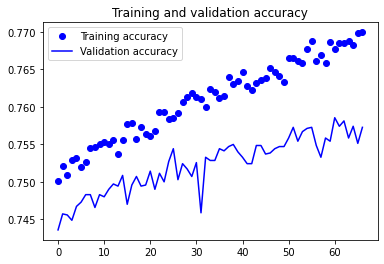

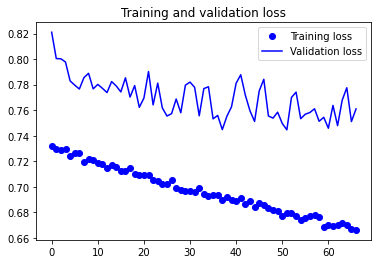

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0001)

model6.compile(run_eagerly=True,
              optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_filepath = '/content/drive/Shareddrives/DeepLearningProject/models/CNN_From_Scratch/model7.hdf5'

checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True,
                             #save_freq = "epoch", 
                             mode='min')

es = EarlyStopping(monitor='val_loss', 
                   mode='min', 
                   verbose=1, 
                   patience=15)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model6.fit(training_dataset,
          validation_data=validation_dataset,
          callbacks=[es,checkpoint,tqdm_callback],
          epochs=80)

acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

536/536 [==============================] - 160s 294ms/step
Accuracy on Test Data: 0.67%
              precision    recall  f1-score   support

           0       0.74      0.89      0.81     39533
           1       0.00      0.00      0.00      3762
           2       0.15      0.10      0.12      7861
           3       0.02      0.00      0.01      1214
           4       0.02      0.01      0.01      1206

    accuracy                           0.67     53576
   macro avg       0.19      0.20      0.19     53576
weighted avg       0.57      0.67      0.61     53576



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


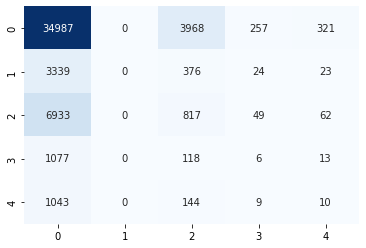

In [ ]:
test_model(model6)